In [376]:
import numpy as np
import pandas as pd
# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup, Comment
import re
import json
import time

In [2]:
vegas_odds = []
for i in range(0, 2700, 100):
    url = '''https://www.pro-football-reference.com/play-index/tgl_finder.cgi?request=1&match=game&year_min=2015&year_max=2019&game_type=E&game_num_min=0&game_num_max=99&week_num_min=0&week_num_max=99&temperature_gtlt=lt&c5val=1.0&order_by=vegas_line&offset={}'''
    vegas_odds.append(pd.read_html(url.format(i))[0])
    

In [3]:
vegas_line = pd.concat(vegas_odds)

In [4]:
vegas_line.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk                 Tm               Year               Date   
0                  1                MIA               2019         2019-09-22   
1                  2                NYJ               2019         2019-09-22   
2                  3                MIA               2019         2019-09-15   
3                  4                MIA               2019         2019-12-29   
4                  5                CIN               2018         2018-12-09   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                Time              LTime Unnamed: 6_level_1                Opp   
0               1:00              12:00                  @                DAL   
1               1:00               1:00                  @                NWE   
2               1:00               1:00                NaN                NWE   
3               1:00               1:00                  @                NWE   
4               4:05               1:05                  @                LAC   

  Unnamed: 8_level_0 Unnamed: 9_level_0 Unnamed: 10_level_0  \
                Week                 G#                 Day   
0                  3                  3                 Sun   
1                  3                  3                 Sun   
2                  2                  2                 Sun   
3                 17                 16                 Sun   
4                 14                 13                 Sun   

  Unnamed: 11_level_0 Unnamed: 12_level_0  Vegas                          \
               Result                  OT Spread     vs. Line Over/Under   
0              L 6-31                 NaN   22.0  not covered       46.5   
1             L 14-30                 NaN   20.5      covered       43.0   
2              L 0-43                 NaN   18.0  not covered       48.5   
3             W 27-24                 NaN   17.5      covered       46.0   
4             L 21-26                 NaN   17.0      covered       48.5   

             
  OU Result  
0     under  
1      over  
2     under  
3      over  
4     under

In [5]:
vegas_line.columns

MultiIndex([( 'Unnamed: 0_level_0',                 'Rk'),
            ( 'Unnamed: 1_level_0',                 'Tm'),
            ( 'Unnamed: 2_level_0',               'Year'),
            ( 'Unnamed: 3_level_0',               'Date'),
            ( 'Unnamed: 4_level_0',               'Time'),
            ( 'Unnamed: 5_level_0',              'LTime'),
            ( 'Unnamed: 6_level_0', 'Unnamed: 6_level_1'),
            ( 'Unnamed: 7_level_0',                'Opp'),
            ( 'Unnamed: 8_level_0',               'Week'),
            ( 'Unnamed: 9_level_0',                 'G#'),
            ('Unnamed: 10_level_0',                'Day'),
            ('Unnamed: 11_level_0',             'Result'),
            ('Unnamed: 12_level_0',                 'OT'),
            (              'Vegas',             'Spread'),
            (              'Vegas',           'vs. Line'),
            (              'Vegas',         'Over/Under'),
            (              'Vegas',          'OU Result'

In [6]:
vegas_line.columns = vegas_line.columns.droplevel()

In [7]:
vegas_line.head()

,Rk,Tm,Year,Date,Time,LTime,Unnamed: 6_level_1,Opp,Week,G#,Day,Result,OT,Spread,vs. Line,Over/Under,OU Result
0,1,MIA,2019,2019-09-22,1:00,12:00,@,DAL,3,3,Sun,L 6-31,NaN,22.0,not covered,46.5,under
1,2,NYJ,2019,2019-09-22,1:00,1:00,@,NWE,3,3,Sun,L 14-30,NaN,20.5,covered,43.0,over
2,3,MIA,2019,2019-09-15,1:00,1:00,NaN,NWE,2,2,Sun,L 0-43,NaN,18.0,not covered,48.5,under
3,4,MIA,2019,2019-12-29,1:00,1:00,@,NWE,17,16,Sun,W 27-24,NaN,17.5,covered,46.0,over
4,5,CIN,2018,2018-12-09,4:05,1:05,@,LAC,14,13,Sun,L 21-26,NaN,17.0,covered,48.5,under


In [8]:
vegas_line.drop(vegas_line[vegas_line['Tm']=='Tm'].index, inplace=True)

In [9]:
vegas_line.reset_index()

,index,Rk,Tm,Year,Date,Time,LTime,Unnamed: 6_level_1,Opp,Week,G#,Day,Result,OT,Spread,vs. Line,Over/Under,OU Result
0,0,1,MIA,2019,2019-09-22,1:00,12:00,@,DAL,3,3,Sun,L 6-31,NaN,22.0,not covered,46.5,under
1,1,2,NYJ,2019,2019-09-22,1:00,1:00,@,NWE,3,3,Sun,L 14-30,NaN,20.5,covered,43.0,over
2,2,3,MIA,2019,2019-09-15,1:00,1:00,NaN,NWE,2,2,Sun,L 0-43,NaN,18.0,not covered,48.5,under
3,3,4,MIA,2019,2019-12-29,1:00,1:00,@,NWE,17,16,Sun,W 27-24,NaN,17.5,covered,46.0,over
4,4,5,CIN,2018,2018-12-09,4:05,1:05,@,LAC,14,13,Sun,L 21-26,NaN,17.0,covered,48.5,under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,68,2666,LAC,2018,2018-12-09,4:05,1:05,NaN,CIN,14,13,Sun,W 26-21,NaN,-17.0,not covered,48.5,under
2666,69,2667,NWE,2019,2019-12-29,1:00,1:00,NaN,MIA,17,16,Sun,L 24-27,NaN,-17.5,not covered,46.0,over
2667,70,2668,NWE,2019,2019-09-15,1:00,1:00,@,MIA,2,2,Sun,W 43-0,NaN,-18.0,covered,48.5,under
2668,71,2669,NWE,2019,2019-09-22,1:00,1:00,NaN,NYJ,3,3,Sun,W 30-14,NaN,-20.5,not covered,43.0,over


In [10]:
vegas_line.columns

Index(['Rk', 'Tm', 'Year', 'Date', 'Time', 'LTime', 'Unnamed: 6_level_1',
       'Opp', 'Week', 'G#', 'Day', 'Result', 'OT', 'Spread', 'vs. Line',
       'Over/Under', 'OU Result'],
      dtype='object')

In [26]:
vegas_line.to_csv('vegas_line.csv')

In [11]:
odds2 = []                                                                                                                                                                                                                                                                                                                                                                                                                                
for i in range(0,300,100):
    url = """https://www.pro-football-reference.com/play-index/tgl_finder.cgi?request=1&match=game&year_min=2019&year_max=2019&game_type=E&game_num_min=0&game_num_max=99&week_num_min=0&week_num_max=99&temperature_gtlt=lt&c1stat=vegas_line&c1comp=gte&c2stat=pass_yds&c2comp=gte&c3stat=points_opp&c3comp=gte&c4stat=rush_yds&c4comp=gte&c5stat=yds_per_play_offense&c5comp=gt&c5val=1.0&order_by=game_date&offset={}"""
    odds2.append(pd.read_html(url.format(i))[0])

In [12]:
odds2_df = pd.concat(odds2)

In [13]:
odds2_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk                 Tm               Year               Date   
0                  1                SFO               2019         2020-02-02   
1                  2                GNB               2019         2020-01-19   
2                  3                TEN               2019         2020-01-19   
3                  4                HOU               2019         2020-01-12   
4                  5                SEA               2019         2020-01-12   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                Time              LTime Unnamed: 6_level_1                Opp   
0               6:30               6:30                  N                KAN   
1               6:40               3:40                  @                SFO   
2               3:05               2:05                  @                KAN   
3               3:05               2:05                  @                KAN   
4               6:40               5:40                  @                GNB   

  Unnamed: 8_level_0 Unnamed: 9_level_0  ... Rushing    Tot Yds & TO      \
                Week                 G#  ...     Y/A TD          Tot Ply   
0                 21                 20  ...    6.41  1          351  54   
1                 20                 19  ...    3.88  1          358  58   
2                 20                 20  ...    3.70  1          295  58   
3                 19                 19  ...    4.48  1          442  78   
4                 19                 19  ...    4.58  2          375  60   

                                          
      Y/P DPly    DY/P   TO    ToP  Time  
0  6.5000   75  5.2933    2  26:47  3:29  
1  6.1724   51  6.9412    3  31:13  3:03  
2  5.0862   64  6.3125  NaN  30:10  3:04  
3  5.6667   57  7.6140    1  34:35  3:25  
4  6.2500   59  5.8305  NaN  30:31  3:09  

[5 rows x 42 columns]

In [14]:
odds2_df.columns

MultiIndex([( 'Unnamed: 0_level_0',                 'Rk'),
            ( 'Unnamed: 1_level_0',                 'Tm'),
            ( 'Unnamed: 2_level_0',               'Year'),
            ( 'Unnamed: 3_level_0',               'Date'),
            ( 'Unnamed: 4_level_0',               'Time'),
            ( 'Unnamed: 5_level_0',              'LTime'),
            ( 'Unnamed: 6_level_0', 'Unnamed: 6_level_1'),
            ( 'Unnamed: 7_level_0',                'Opp'),
            ( 'Unnamed: 8_level_0',               'Week'),
            ( 'Unnamed: 9_level_0',                 'G#'),
            ('Unnamed: 10_level_0',                'Day'),
            ('Unnamed: 11_level_0',             'Result'),
            ('Unnamed: 12_level_0',                 'OT'),
            (             'Points',                 'PF'),
            (             'Points',                 'PA'),
            (             'Points',                 'PD'),
            (             'Points',                 'PC'

In [15]:
odds2_df.columns = odds2_df.columns.to_flat_index()

In [16]:
odds2_df.head()

,"(Unnamed: 0_level_0, Rk)","(Unnamed: 1_level_0, Tm)","(Unnamed: 2_level_0, Year)","(Unnamed: 3_level_0, Date)","(Unnamed: 4_level_0, Time)","(Unnamed: 5_level_0, LTime)","(Unnamed: 6_level_0, Unnamed: 6_level_1)","(Unnamed: 7_level_0, Opp)","(Unnamed: 8_level_0, Week)","(Unnamed: 9_level_0, G#)",...,"(Rushing, Y/A)","(Rushing, TD)","(Tot Yds & TO, Tot)","(Tot Yds & TO, Ply)","(Tot Yds & TO, Y/P)","(Tot Yds & TO, DPly)","(Tot Yds & TO, DY/P)","(Tot Yds & TO, TO)","(Tot Yds & TO, ToP)","(Tot Yds & TO, Time)"
0,1,SFO,2019,2020-02-02,6:30,6:30,N,KAN,21,20,...,6.41,1,351,54,6.5000,75,5.2933,2,26:47,3:29
1,2,GNB,2019,2020-01-19,6:40,3:40,@,SFO,20,19,...,3.88,1,358,58,6.1724,51,6.9412,3,31:13,3:03
2,3,TEN,2019,2020-01-19,3:05,2:05,@,KAN,20,20,...,3.70,1,295,58,5.0862,64,6.3125,NaN,30:10,3:04
3,4,HOU,2019,2020-01-12,3:05,2:05,@,KAN,19,19,...,4.48,1,442,78,5.6667,57,7.6140,1,34:35,3:25
4,5,SEA,2019,2020-01-12,6:40,5:40,@,GNB,19,19,...,4.58,2,375,60,6.2500,59,5.8305,NaN,30:31,3:09


In [17]:
odds2_df.columns

Index([                ('Unnamed: 0_level_0', 'Rk'),
                       ('Unnamed: 1_level_0', 'Tm'),
                     ('Unnamed: 2_level_0', 'Year'),
                     ('Unnamed: 3_level_0', 'Date'),
                     ('Unnamed: 4_level_0', 'Time'),
                    ('Unnamed: 5_level_0', 'LTime'),
       ('Unnamed: 6_level_0', 'Unnamed: 6_level_1'),
                      ('Unnamed: 7_level_0', 'Opp'),
                     ('Unnamed: 8_level_0', 'Week'),
                       ('Unnamed: 9_level_0', 'G#'),
                     ('Unnamed: 10_level_0', 'Day'),
                  ('Unnamed: 11_level_0', 'Result'),
                      ('Unnamed: 12_level_0', 'OT'),
                                   ('Points', 'PF'),
                                   ('Points', 'PA'),
                                   ('Points', 'PD'),
                                   ('Points', 'PC'),
                                ('Vegas', 'Spread'),
                              ('Vegas', 'vs. L

In [18]:
odds2_df.reset_index()

,index,"(Unnamed: 0_level_0, Rk)","(Unnamed: 1_level_0, Tm)","(Unnamed: 2_level_0, Year)","(Unnamed: 3_level_0, Date)","(Unnamed: 4_level_0, Time)","(Unnamed: 5_level_0, LTime)","(Unnamed: 6_level_0, Unnamed: 6_level_1)","(Unnamed: 7_level_0, Opp)","(Unnamed: 8_level_0, Week)",...,"(Rushing, Y/A)","(Rushing, TD)","(Tot Yds & TO, Tot)","(Tot Yds & TO, Ply)","(Tot Yds & TO, Y/P)","(Tot Yds & TO, DPly)","(Tot Yds & TO, DY/P)","(Tot Yds & TO, TO)","(Tot Yds & TO, ToP)","(Tot Yds & TO, Time)"
0,0,1,SFO,2019,2020-02-02,6:30,6:30,N,KAN,21,...,6.41,1,351,54,6.5000,75,5.2933,2,26:47,3:29
1,1,2,GNB,2019,2020-01-19,6:40,3:40,@,SFO,20,...,3.88,1,358,58,6.1724,51,6.9412,3,31:13,3:03
2,2,3,TEN,2019,2020-01-19,3:05,2:05,@,KAN,20,...,3.70,1,295,58,5.0862,64,6.3125,NaN,30:10,3:04
3,3,4,HOU,2019,2020-01-12,3:05,2:05,@,KAN,19,...,4.48,1,442,78,5.6667,57,7.6140,1,34:35,3:25
4,4,5,SEA,2019,2020-01-12,6:40,5:40,@,GNB,19,...,4.58,2,375,60,6.2500,59,5.8305,NaN,30:31,3:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,65,263,TEN,2019,2019-09-08,1:00,1:00,@,CLE,1,...,4.39,1,339,56,6.0536,63,5.4921,NaN,29:18,3:12
274,66,264,PIT,2019,2019-09-08,8:20,8:20,@,NWE,1,...,2.46,0,308,61,5.0492,67,6.9403,1,27:27,3:00
275,67,265,SFO,2019,2019-09-08,4:25,4:25,@,TAM,1,...,3.06,0,256,60,4.2667,65,4.5385,2,30:04,3:06
276,68,266,WAS,2019,2019-09-08,1:00,1:00,@,PHI,1,...,2.15,0,398,58,6.8621,71,6.1408,NaN,25:33,3:13


In [19]:
odds2_df.drop(odds2_df[odds2_df[('Unnamed: 1_level_0', 'Tm')] == 'Tm'].index, inplace=True)

In [20]:
odds2_df.shape

(267, 42)

In [21]:
odds2_df = odds2_df.rename(columns={('Unnamed: 0_level_0', 'Rk'):'rk', ('Unnamed: 1_level_0', 'Tm'): 'Home_team',
('Unnamed: 2_level_0', 'Year'): 'year',
('Unnamed: 3_level_0', 'Date'): 'date',
('Unnamed: 4_level_0', 'Time'): 'time',
('Unnamed: 5_level_0', 'LTime'): 'local_time', 
('Unnamed: 6_level_0', 'Unnamed: 6_level_1'): 'at',
('Unnamed: 7_level_0', 'Opp'): 'Away_team',
('Unnamed: 8_level_0', 'Week'): 'Week',
('Unnamed: 9_level_0', 'G#'): 'Game_Number',
('Unnamed: 10_level_0', 'Day'): 'day',
('Unnamed: 11_level_0', 'Result'): 'result',
('Unnamed: 12_level_0', 'OT'): 'OT',
('Points', 'PF'): 'points_for',
('Points', 'PA'): 'points_against',
('Points', 'PD'): 'point_differential',
('Points', 'PC'): 'combined_points',
('Vegas', 'Spread'): 'spread',
('Vegas', 'vs. Line'): 'vs_line',
('Vegas', 'Over/Under'): 'over_under',
('Vegas', 'OU Result'): 'over_under_result',
('Passing', 'Cmp'): 'pass_completions',
('Passing', 'Att'): 'pass_attempts',
('Passing', 'Cmp%'): 'completion_percentage',
('Passing', 'Yds'): 'passing_yards',
('Passing', 'TD'): 'passing_touchdowns',
('Passing', 'Int'): 'interceptions',
('Passing', 'Sk'): 'times_sacked',
('Passing', 'Yds.1'): 'sack_yards_lost',
('Passing', 'Rate'): 'qbr',
('Rushing', 'Att'): 'rushing_attempts',
('Rushing', 'Yds'): 'rushing_yards',
('Rushing', 'Y/A'): 'rushing_yards_per_attempt',
('Rushing', 'TD'): 'rushing_touchdowns',
('Tot Yds & TO', 'Tot'): 'total_yards',
('Tot Yds & TO', 'Ply'): 'offensive_plays',
('Tot Yds & TO', 'Y/P'): 'yards_per_play_offense',
('Tot Yds & TO', 'DPly'): 'defensive_plays',
('Tot Yds & TO', 'DY/P'): 'yards_allowed_per_defensive_play',
('Tot Yds & TO', 'TO'): 'turnovers_lost',
('Tot Yds & TO', 'ToP'): 'time_of_possession',
('Tot Yds & TO', 'Time'): 'game_duration'})

In [22]:
odds2_df.head()

,rk,Home_team,year,date,time,local_time,at,Away_team,Week,Game_Number,...,rushing_yards_per_attempt,rushing_touchdowns,total_yards,offensive_plays,yards_per_play_offense,defensive_plays,yards_allowed_per_defensive_play,turnovers_lost,time_of_possession,game_duration
0,1,SFO,2019,2020-02-02,6:30,6:30,N,KAN,21,20,...,6.41,1,351,54,6.5000,75,5.2933,2,26:47,3:29
1,2,GNB,2019,2020-01-19,6:40,3:40,@,SFO,20,19,...,3.88,1,358,58,6.1724,51,6.9412,3,31:13,3:03
2,3,TEN,2019,2020-01-19,3:05,2:05,@,KAN,20,20,...,3.70,1,295,58,5.0862,64,6.3125,NaN,30:10,3:04
3,4,HOU,2019,2020-01-12,3:05,2:05,@,KAN,19,19,...,4.48,1,442,78,5.6667,57,7.6140,1,34:35,3:25
4,5,SEA,2019,2020-01-12,6:40,5:40,@,GNB,19,19,...,4.58,2,375,60,6.2500,59,5.8305,NaN,30:31,3:09


In [23]:
odds2_df.columns

Index(['rk', 'Home_team', 'year', 'date', 'time', 'local_time', 'at',
       'Away_team', 'Week', 'Game_Number', 'day', 'result', 'OT', 'points_for',
       'points_against', 'point_differential', 'combined_points', 'spread',
       'vs_line', 'over_under', 'over_under_result', 'pass_completions',
       'pass_attempts', 'completion_percentage', 'passing_yards',
       'passing_touchdowns', 'interceptions', 'times_sacked',
       'sack_yards_lost', 'qbr', 'rushing_attempts', 'rushing_yards',
       'rushing_yards_per_attempt', 'rushing_touchdowns', 'total_yards',
       'offensive_plays', 'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'game_duration'],
      dtype='object')

In [28]:
odds2_df = odds2_df.drop(columns=['rk', 'at'])

In [29]:
odds2_df.head()

,Home_team,year,date,time,local_time,Away_team,Week,Game_Number,day,result,...,rushing_yards_per_attempt,rushing_touchdowns,total_yards,offensive_plays,yards_per_play_offense,defensive_plays,yards_allowed_per_defensive_play,turnovers_lost,time_of_possession,game_duration
0,SFO,2019,2020-02-02,6:30,6:30,KAN,21,20,Sun,L 20-31,...,6.41,1,351,54,6.5000,75,5.2933,2,26:47,3:29
1,GNB,2019,2020-01-19,6:40,3:40,SFO,20,19,Sun,L 20-37,...,3.88,1,358,58,6.1724,51,6.9412,3,31:13,3:03
2,TEN,2019,2020-01-19,3:05,2:05,KAN,20,20,Sun,L 24-35,...,3.70,1,295,58,5.0862,64,6.3125,NaN,30:10,3:04
3,HOU,2019,2020-01-12,3:05,2:05,KAN,19,19,Sun,L 31-51,...,4.48,1,442,78,5.6667,57,7.6140,1,34:35,3:25
4,SEA,2019,2020-01-12,6:40,5:40,GNB,19,19,Sun,L 23-28,...,4.58,2,375,60,6.2500,59,5.8305,NaN,30:31,3:09


In [56]:
odds2_df['over_under'][0]

'52.5'

In [34]:
odds2_df = odds2_df.reset_index()

In [37]:
odds2_df = odds2_df.drop(columns='index')

In [39]:
type(odds2_df['point_differential'][0])

str

In [55]:
odds2_df['spread'][40:60]

40     7.0
41     7.0
42     3.0
43     8.0
44    10.5
45     1.0
46     6.0
47     4.0
48    10.5
49     3.0
50     1.0
51    10.0
52     5.5
53     3.0
54     7.0
55     3.5
56     1.0
57     7.0
58    17.0
59     9.5
Name: spread, dtype: object

In [47]:
odds2_df['vs_line'].unique()

array(['not covered', 'covered', 'push'], dtype=object)

In [40]:
odds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 40 columns):
Home_team                           267 non-null object
year                                267 non-null object
date                                267 non-null object
time                                267 non-null object
local_time                          267 non-null object
Away_team                           267 non-null object
Week                                267 non-null object
Game_Number                         267 non-null object
day                                 267 non-null object
result                              267 non-null object
OT                                  11 non-null object
points_for                          267 non-null object
points_against                      267 non-null object
point_differential                  267 non-null object
combined_points                     267 non-null object
spread                              267 non-null object


In [58]:
odds2_df.head()

,Home_team,year,date,time,local_time,Away_team,Week,Game_Number,day,result,...,rushing_yards_per_attempt,rushing_touchdowns,total_yards,offensive_plays,yards_per_play_offense,defensive_plays,yards_allowed_per_defensive_play,turnovers_lost,time_of_possession,game_duration
0,SFO,2019,2020-02-02,6:30,6:30,KAN,21,20,Sun,L 20-31,...,6.41,1,351,54,6.5000,75,5.2933,2,26:47,3:29
1,GNB,2019,2020-01-19,6:40,3:40,SFO,20,19,Sun,L 20-37,...,3.88,1,358,58,6.1724,51,6.9412,3,31:13,3:03
2,TEN,2019,2020-01-19,3:05,2:05,KAN,20,20,Sun,L 24-35,...,3.70,1,295,58,5.0862,64,6.3125,NaN,30:10,3:04
3,HOU,2019,2020-01-12,3:05,2:05,KAN,19,19,Sun,L 31-51,...,4.48,1,442,78,5.6667,57,7.6140,1,34:35,3:25
4,SEA,2019,2020-01-12,6:40,5:40,GNB,19,19,Sun,L 23-28,...,4.58,2,375,60,6.2500,59,5.8305,NaN,30:31,3:09


In [60]:
odds2_df.columns

Index(['Home_team', 'year', 'date', 'time', 'local_time', 'Away_team', 'Week',
       'Game_Number', 'day', 'result', 'OT', 'points_for', 'points_against',
       'point_differential', 'combined_points', 'spread', 'vs_line',
       'over_under', 'over_under_result', 'pass_completions', 'pass_attempts',
       'completion_percentage', 'passing_yards', 'passing_touchdowns',
       'interceptions', 'times_sacked', 'sack_yards_lost', 'qbr',
       'rushing_attempts', 'rushing_yards', 'rushing_yards_per_attempt',
       'rushing_touchdowns', 'total_yards', 'offensive_plays',
       'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'game_duration'],
      dtype='object')

In [68]:
odds2_df['Week'][0]

'21'

In [73]:
dfcolumns = ['Week','Game_Number', 'points_for', 'points_against',
       'point_differential', 'combined_points', 'spread',
       'over_under', 'pass_completions', 'pass_attempts',
       'completion_percentage', 'passing_yards', 'passing_touchdowns',
       'interceptions', 'times_sacked', 'sack_yards_lost', 'qbr',
       'rushing_attempts', 'rushing_yards', 'rushing_yards_per_attempt',
       'rushing_touchdowns', 'total_yards', 'offensive_plays',
       'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost']

def text_to_num(text):
    return float(text)

def convert_into_float(data):
    data[dfcolumns] = data[dfcolumns].applymap(text_to_num)
    return data

In [74]:
len(dfcolumns)

27

In [71]:
odds2_df = convert_into_float(odds2_df)

In [72]:
odds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 40 columns):
Home_team                           267 non-null object
year                                267 non-null object
date                                267 non-null object
time                                267 non-null object
local_time                          267 non-null object
Away_team                           267 non-null object
Week                                267 non-null float64
Game_Number                         267 non-null float64
day                                 267 non-null object
result                              267 non-null object
OT                                  11 non-null object
points_for                          267 non-null float64
points_against                      267 non-null float64
point_differential                  267 non-null float64
combined_points                     267 non-null float64
spread                              267 non-null f

In [75]:
odds2_df.replace(to_replace=['not covered', 'covered', 'push'], value = [-1,1,0], inplace=True)


In [76]:
odds2_df.replace(to_replace=['under', 'over', 'push'], value = [-1,1,0], inplace=True)

In [100]:
odds2_df['date'][0]

'2020-02-02'

In [94]:
odds2_df['year'][0]

'2019'

In [106]:
odds2_df = odds2_df.drop(columns='year')

In [96]:
odds2_df['game_duration'][0]

'3:29'

In [97]:
odds2_df['time_of_possession'][0]

'26:47'

In [99]:
odds2_df['year'][0]

'2019'

In [107]:
odds2_df['game_date_time'] = odds2_df['date'] +' '+ odds2_df['local_time']

In [108]:
odds2_df['game_date_time'][0]

'2020-02-02 6:30'

In [109]:
x = pd.to_datetime(odds2_df['game_date_time'][0])
x

Timestamp('2020-02-02 06:30:00')

In [110]:
odds2_df['game_date_time'] = odds2_df['game_date_time'].apply(lambda x: pd.to_datetime(x))

In [118]:
odds2_df['time_of_possession'][0]

'26:47'

In [117]:
                                                                                                                                     

float(odds2_df['time_of_possession'][0].split(':')[0])/60 + float(odds2_df['time_of_possession'][0].split(':')[1])/3600

0.4463888888888889

In [121]:
def top_ratio(text):
    return float(text.split(':')[0])/60 + float(text.split(':')[1])/3600
def time_of_possession_to_ratio(data):
    data['time_of_possession'] = data['time_of_possession'].apply(lambda x: top_ratio(x))
    return data

In [123]:
time_of_possession_to_ratio(odds2_df)

AttributeError: 'float' object has no attribute 'split'

In [124]:
odds2_df

,Home_team,date,time,local_time,Away_team,Week,Game_Number,day,result,OT,...,rushing_touchdowns,total_yards,offensive_plays,yards_per_play_offense,defensive_plays,yards_allowed_per_defensive_play,turnovers_lost,time_of_possession,game_duration,game_date_time
0,SFO,2020-02-02,6:30,6:30,KAN,21.0,20.0,Sun,L 20-31,NaN,...,1.0,351.0,54.0,6.5000,75.0,5.2933,2.0,0.446389,3:29,2020-02-02 06:30:00
1,GNB,2020-01-19,6:40,3:40,SFO,20.0,19.0,Sun,L 20-37,NaN,...,1.0,358.0,58.0,6.1724,51.0,6.9412,3.0,0.520278,3:03,2020-01-19 03:40:00
2,TEN,2020-01-19,3:05,2:05,KAN,20.0,20.0,Sun,L 24-35,NaN,...,1.0,295.0,58.0,5.0862,64.0,6.3125,NaN,0.502778,3:04,2020-01-19 02:05:00
3,HOU,2020-01-12,3:05,2:05,KAN,19.0,19.0,Sun,L 31-51,NaN,...,1.0,442.0,78.0,5.6667,57.0,7.6140,1.0,0.576389,3:25,2020-01-12 02:05:00
4,SEA,2020-01-12,6:40,5:40,GNB,19.0,19.0,Sun,L 23-28,NaN,...,2.0,375.0,60.0,6.2500,59.0,5.8305,NaN,0.508611,3:09,2020-01-12 05:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,TEN,2019-09-08,1:00,1:00,CLE,1.0,1.0,Sun,W 43-13,NaN,...,1.0,339.0,56.0,6.0536,63.0,5.4921,NaN,0.488333,3:12,2019-09-08 01:00:00
263,PIT,2019-09-08,8:20,8:20,NWE,1.0,1.0,Sun,L 3-33,NaN,...,0.0,308.0,61.0,5.0492,67.0,6.9403,1.0,0.457500,3:00,2019-09-08 08:20:00
264,SFO,2019-09-08,4:25,4:25,TAM,1.0,1.0,Sun,W 31-17,NaN,...,0.0,256.0,60.0,4.2667,65.0,4.5385,2.0,0.501111,3:06,2019-09-08 04:25:00
265,WAS,2019-09-08,1:00,1:00,PHI,1.0,1.0,Sun,L 27-32,NaN,...,0.0,398.0,58.0,6.8621,71.0,6.1408,NaN,0.425833,3:13,2019-09-08 01:00:00


In [125]:
odds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 40 columns):
Home_team                           267 non-null object
date                                267 non-null object
time                                267 non-null object
local_time                          267 non-null object
Away_team                           267 non-null object
Week                                267 non-null float64
Game_Number                         267 non-null float64
day                                 267 non-null object
result                              267 non-null object
OT                                  11 non-null object
points_for                          267 non-null float64
points_against                      267 non-null float64
point_differential                  267 non-null float64
combined_points                     267 non-null float64
spread                              267 non-null float64
vs_line                             267 non-null 

In [126]:
odds2_df = odds2_df.fillna(value=0)

In [127]:
odds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 40 columns):
Home_team                           267 non-null object
date                                267 non-null object
time                                267 non-null object
local_time                          267 non-null object
Away_team                           267 non-null object
Week                                267 non-null float64
Game_Number                         267 non-null float64
day                                 267 non-null object
result                              267 non-null object
OT                                  267 non-null object
points_for                          267 non-null float64
points_against                      267 non-null float64
point_differential                  267 non-null float64
combined_points                     267 non-null float64
spread                              267 non-null float64
vs_line                             267 non-null

In [80]:
import requests 

source = requests.get("https://www.bovada.lv/services/sports/event/v2/events/A/description/football/nfl").json()

print(source)

[{'path': [{'id': '241', 'link': '/football/nfl', 'description': 'NFL', 'type': 'LEAGUE', 'sportCode': 'FOOT', 'order': 2, 'leaf': True, 'current': True}, {'id': '1', 'link': '/football', 'description': 'Football', 'type': 'SPORT', 'sportCode': 'FOOT', 'order': 6, 'leaf': False, 'current': False}], 'events': [{'id': '7234968', 'description': 'Houston Texans @ Kansas City Chiefs', 'type': 'GAMEEVENT', 'link': '/football/nfl/houston-texans-kansas-city-chiefs-202009102020', 'status': 'O', 'sport': 'FOOT', 'startTime': 1599783600000, 'live': False, 'awayTeamFirst': True, 'denySameGame': 'NO', 'teaserAllowed': True, 'competitionId': '241', 'notes': '', 'numMarkets': 2, 'lastModified': 1589026345128, 'competitors': [{'id': '7234968-11852811', 'name': 'Kansas City Chiefs', 'home': True}, {'id': '7234968-11904230', 'name': 'Houston Texans', 'home': False}], 'displayGroups': [{'id': '100-41', 'description': 'Game Lines', 'defaultType': True, 'alternateType': False, 'markets': [{'id': '115774680

In [81]:
type(source)

list

In [82]:
len(source)

1

In [83]:
type(source[0])

dict

In [84]:
data = source[0]

In [85]:
data.keys()

dict_keys(['path', 'events'])

In [87]:
type(data['events']), len(data['events'])

(list, 32)

In [88]:
set(type(e) for e in data['events'])

{dict}

In [89]:
all(data['events'][0].keys() == e.keys() for e in data['events'][1:])

False

In [90]:
data['events'][0].keys()

dict_keys(['id', 'description', 'type', 'link', 'status', 'sport', 'startTime', 'live', 'awayTeamFirst', 'denySameGame', 'teaserAllowed', 'competitionId', 'notes', 'numMarkets', 'lastModified', 'competitors', 'displayGroups'])

In [91]:
for k, v in data['events'][0].items():
    print(k, type(v))

id <class 'str'>
description <class 'str'>
type <class 'str'>
link <class 'str'>
status <class 'str'>
sport <class 'str'>
startTime <class 'int'>
live <class 'bool'>
awayTeamFirst <class 'bool'>
denySameGame <class 'str'>
teaserAllowed <class 'bool'>
competitionId <class 'str'>
notes <class 'str'>
numMarkets <class 'int'>
lastModified <class 'int'>
competitors <class 'list'>
displayGroups <class 'list'>


In [92]:
data['events'][0]

{'id': '7234968',
 'description': 'Houston Texans @ Kansas City Chiefs',
 'type': 'GAMEEVENT',
 'link': '/football/nfl/houston-texans-kansas-city-chiefs-202009102020',
 'status': 'O',
 'sport': 'FOOT',
 'startTime': 1599783600000,
 'live': False,
 'awayTeamFirst': True,
 'denySameGame': 'NO',
 'teaserAllowed': True,
 'competitionId': '241',
 'notes': '',
 'numMarkets': 2,
 'lastModified': 1589026345128,
 'competitors': [{'id': '7234968-11852811',
   'name': 'Kansas City Chiefs',
   'home': True},
  {'id': '7234968-11904230', 'name': 'Houston Texans', 'home': False}],
 'displayGroups': [{'id': '100-41',
   'description': 'Game Lines',
   'defaultType': True,
   'alternateType': False,
   'markets': [{'id': '115774680',
     'descriptionKey': 'Main Dynamic Asian Handicap',
     'description': 'Point Spread',
     'key': '2W-HCAP',
     'marketTypeId': '120718',
     'status': 'O',
     'singleOnly': False,
     'notes': 'Regular Season Week 1',
     'period': {'id': '119',
      'descrip

In [144]:
url = """https://www.oddsportal.com/american-football/usa/nfl-2019-2020/results/#/page/1/"""
money_line.append(pd.read_html(url))

In [145]:
len(money_line)

8

In [146]:
money_line[0]

[                  0
 0     Dropping Odds
 1      Blocked Odds
 2        Value Bets
 3       Hot Matches
 4    Best Handicaps
 5    Moving Margins
 6  Archived Results
 7         Standings,                 0               1
 0  Premier League   Vysshaya Liga
 1    Liga Primera      K League 1
 2  Premier League  WTA Exhibition
 3  ATP Exhibition       Overwatch
 4        Liga Pro  Comet Division
 5   PDC Home Tour             NaN,                                                    0
 0  Try RebelBetting for FREE  Increase your inves...,     0                                                  1
 0 NaN  Try RebelBetting for FREE  Increase your inves...,                                                    0
 0  Exclusive Offer!  Register via OddsPortal, ver...,     0                                                  1
 0 NaN  Exclusive Offer!  Register via OddsPortal, ver...]

In [147]:
money_line[6]

[                  0
 0     Dropping Odds
 1      Blocked Odds
 2        Value Bets
 3       Hot Matches
 4    Best Handicaps
 5    Moving Margins
 6  Archived Results
 7         Standings,                 0               1
 0  Premier League   Vysshaya Liga
 1    Liga Primera      K League 1
 2  Premier League  WTA Exhibition
 3  ATP Exhibition       Overwatch
 4        Liga Pro  Comet Division
 5   PDC Home Tour             NaN,                                                    0
 0  Try RebelBetting for FREE  Increase your inves...,     0                                                  1
 0 NaN  Try RebelBetting for FREE  Increase your inves...,                                                    0
 0  Exclusive Offer!  Register via OddsPortal, ver...,     0                                                  1
 0 NaN  Exclusive Offer!  Register via OddsPortal, ver...]

In [148]:
money_line[7]

[                  0
 0     Dropping Odds
 1      Blocked Odds
 2        Value Bets
 3       Hot Matches
 4    Best Handicaps
 5    Moving Margins
 6  Archived Results
 7         Standings,                 0               1
 0  Premier League   Vysshaya Liga
 1    Liga Primera      K League 1
 2  Premier League  WTA Exhibition
 3  ATP Exhibition       Overwatch
 4        Liga Pro  Comet Division
 5   PDC Home Tour             NaN,                                                    0
 0  Try RebelBetting for FREE  Increase your inves...,     0                                                  1
 0 NaN  Try RebelBetting for FREE  Increase your inves...,                                                    0
 0  Exclusive Offer!  Register via OddsPortal, ver...,     0                                                  1
 0 NaN  Exclusive Offer!  Register via OddsPortal, ver...]

In [134]:
money_df = pd.concat(money_line)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [149]:
from bs4 import BeautifulSoup

In [130]:
money_df.head()

,0
0,Dropping Odds
1,Blocked Odds
2,Value Bets
3,Hot Matches
4,Best Handicaps


In [150]:
url = """https://www.oddsportal.com/american-football/usa/nfl-2019-2020/results/#/page/1/"""
r = requests.get(url)

In [152]:
r.status_code

404

In [157]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait

In [169]:
driver = webdriver.Chrome(executable_path='/home/robert/Desktop/chromedriver')
driver.get("https://www.oddsportal.com/american-football/usa/nfl-2019-2020/results/")

In [172]:
driver.find_element_by_xpath("""/html/body/div[1]/div/div[2]/div[6]/div[1]/div/div[1]/div[2]/div[1]/div[6]/table""").text

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[1]/div/div[2]/div[6]/div[1]/div/div[1]/div[2]/div[1]/div[6]/table"}
  (Session info: chrome=81.0.4044.138)


In [ ]:
//*[@id="tournamentTable"]


In [174]:
odds2_df['Week'].unique()

array([21., 20., 19., 18., 17., 16., 15., 14., 13., 12., 11., 10.,  9.,
        8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [175]:
weeks_1_through_4 = odds2_df[odds2_df['Week'] < 5]

In [176]:
weeks_1_through_4

,Home_team,date,time,local_time,Away_team,Week,Game_Number,day,result,OT,...,rushing_touchdowns,total_yards,offensive_plays,yards_per_play_offense,defensive_plays,yards_allowed_per_defensive_play,turnovers_lost,time_of_possession,game_duration,game_date_time
204,CIN,2019-09-30,8:15,8:15,PIT,4.0,4.0,Mon,L 3-27,0,...,0.0,175.0,64.0,2.7344,56.0,5.8214,2.0,0.503889,2:56,2019-09-30 08:15:00
205,BUF,2019-09-29,1:00,1:00,NWE,4.0,4.0,Sun,L 10-16,0,...,1.0,375.0,71.0,5.2817,62.0,3.6129,4.0,0.544444,3:19,2019-09-29 01:00:00
206,CAR,2019-09-29,1:00,12:00,HOU,4.0,4.0,Sun,W 16-10,0,...,1.0,297.0,65.0,4.5692,62.0,4.2581,3.0,0.510556,3:06,2019-09-29 12:00:00
207,CHI,2019-09-29,4:25,3:25,MIN,4.0,4.0,Sun,W 16-6,0,...,0.0,269.0,67.0,4.0149,58.0,3.8276,0.0,0.590833,2:59,2019-09-29 03:25:00
208,CLE,2019-09-29,1:00,1:00,BAL,4.0,4.0,Sun,W 40-25,0,...,4.0,530.0,61.0,8.6885,67.0,5.8955,1.0,0.504722,3:08,2019-09-29 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,TEN,2019-09-08,1:00,1:00,CLE,1.0,1.0,Sun,W 43-13,0,...,1.0,339.0,56.0,6.0536,63.0,5.4921,0.0,0.488333,3:12,2019-09-08 01:00:00
263,PIT,2019-09-08,8:20,8:20,NWE,1.0,1.0,Sun,L 3-33,0,...,0.0,308.0,61.0,5.0492,67.0,6.9403,1.0,0.457500,3:00,2019-09-08 08:20:00
264,SFO,2019-09-08,4:25,4:25,TAM,1.0,1.0,Sun,W 31-17,0,...,0.0,256.0,60.0,4.2667,65.0,4.5385,2.0,0.501111,3:06,2019-09-08 04:25:00
265,WAS,2019-09-08,1:00,1:00,PHI,1.0,1.0,Sun,L 27-32,0,...,0.0,398.0,58.0,6.8621,71.0,6.1408,0.0,0.425833,3:13,2019-09-08 01:00:00


In [177]:
week5 = odds2_df[odds2_df['Week'] == 5]

In [178]:
week5

,Home_team,date,time,local_time,Away_team,Week,Game_Number,day,result,OT,...,rushing_touchdowns,total_yards,offensive_plays,yards_per_play_offense,defensive_plays,yards_allowed_per_defensive_play,turnovers_lost,time_of_possession,game_duration,game_date_time
189,CLE,2019-10-07,8:15,5:15,SFO,5.0,5.0,Mon,L 3-31,0,...,0.0,180.0,46.0,3.9130,71.0,6.2817,4.0,0.371389,2:57,2019-10-07 05:15:00
190,ATL,2019-10-06,1:00,12:00,HOU,5.0,5.0,Sun,L 32-53,0,...,1.0,373.0,68.0,5.4853,67.0,8.8358,1.0,0.483333,3:13,2019-10-06 12:00:00
191,BUF,2019-10-06,1:00,12:00,TEN,5.0,5.0,Sun,W 14-7,0,...,0.0,313.0,63.0,4.9683,54.0,4.6667,1.0,0.520000,2:54,2019-10-06 12:00:00
192,IND,2019-10-06,8:20,7:20,KAN,5.0,5.0,Sun,W 19-13,0,...,1.0,331.0,74.0,4.4730,57.0,5.6842,1.0,0.620833,3:15,2019-10-06 07:20:00
193,ARI,2019-10-06,1:00,1:00,CIN,5.0,5.0,Sun,W 26-23,0,...,2.0,514.0,71.0,7.2394,62.0,5.9677,0.0,0.517500,3:03,2019-10-06 01:00:00
194,DEN,2019-10-06,4:05,1:05,LAC,5.0,5.0,Sun,W 20-13,0,...,1.0,350.0,55.0,6.3636,64.0,3.8438,2.0,0.493333,3:03,2019-10-06 01:05:00
195,GNB,2019-10-06,4:25,3:25,DAL,5.0,5.0,Sun,W 34-24,0,...,4.0,335.0,65.0,5.1538,68.0,8.2794,0.0,0.611944,3:31,2019-10-06 03:25:00
196,JAX,2019-10-06,1:00,1:00,CAR,5.0,5.0,Sun,L 27-34,0,...,1.0,507.0,77.0,6.5844,61.0,7.2951,3.0,0.540000,3:28,2019-10-06 01:00:00
197,NYG,2019-10-06,1:00,1:00,MIN,5.0,5.0,Sun,L 10-28,0,...,0.0,211.0,62.0,3.4032,64.0,7.6563,1.0,0.455556,3:03,2019-10-06 01:00:00
198,NYJ,2019-10-06,1:00,1:00,PHI,5.0,4.0,Sun,L 6-31,0,...,1.0,128.0,55.0,2.3273,59.0,4.4915,3.0,0.485556,3:01,2019-10-06 01:00:00


In [181]:
odds2_df['result'][0].split()[0]

'L'

In [183]:
odds2_df['result'][0].split()[1].split('-')

['20', '31']

In [184]:
odds2_df['points_for'][0]

20.0

In [185]:
odds2_df['result'] = odds2_df['result'].apply(lambda x: x.split()[0])

In [186]:
odds2_df['result'].unique()

array(['L', 'W', 'T'], dtype=object)

In [187]:
odds2_df['result'] = odds2_df['result'].replace(to_replace=['L', 'W', 'T'], value=[-1,1,0])

In [195]:
odds2_df = odds2_df.drop(columns=['date', 'time', 'local_time', 'day'])

In [198]:
odds2_df['OT'] = odds2_df['OT'].replace(to_replace=['OT'], value=[1])

In [199]:
odds2_df.columns

Index(['Home_team', 'Away_team', 'Week', 'Game_Number', 'result', 'OT',
       'points_for', 'points_against', 'point_differential', 'combined_points',
       'spread', 'vs_line', 'over_under', 'over_under_result',
       'pass_completions', 'pass_attempts', 'completion_percentage',
       'passing_yards', 'passing_touchdowns', 'interceptions', 'times_sacked',
       'sack_yards_lost', 'qbr', 'rushing_attempts', 'rushing_yards',
       'rushing_yards_per_attempt', 'rushing_touchdowns', 'total_yards',
       'offensive_plays', 'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'game_duration', 'game_date_time'],
      dtype='object')

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [200]:
week5 = odds2_df[odds2_df['Week'] == 5]
weeks_1_through_4 = odds2_df[odds2_df['Week'] < 5]

In [201]:
week5c = week5.copy()
w1_4 = weeks_1_through_4.copy()

In [207]:
w1_4.head()

,Home_team,Away_team,Week,Game_Number,result,OT,points_for,points_against,point_differential,combined_points,...,rushing_touchdowns,total_yards,offensive_plays,yards_per_play_offense,defensive_plays,yards_allowed_per_defensive_play,turnovers_lost,time_of_possession,game_duration,game_date_time
204,CIN,PIT,4.0,4.0,-1,0,3.0,27.0,-24.0,30.0,...,0.0,175.0,64.0,2.7344,56.0,5.8214,2.0,0.503889,2:56,2019-09-30 08:15:00
205,BUF,NWE,4.0,4.0,-1,0,10.0,16.0,-6.0,26.0,...,1.0,375.0,71.0,5.2817,62.0,3.6129,4.0,0.544444,3:19,2019-09-29 01:00:00
206,CAR,HOU,4.0,4.0,1,0,16.0,10.0,6.0,26.0,...,1.0,297.0,65.0,4.5692,62.0,4.2581,3.0,0.510556,3:06,2019-09-29 12:00:00
207,CHI,MIN,4.0,4.0,1,0,16.0,6.0,10.0,22.0,...,0.0,269.0,67.0,4.0149,58.0,3.8276,0.0,0.590833,2:59,2019-09-29 03:25:00
208,CLE,BAL,4.0,4.0,1,0,40.0,25.0,15.0,65.0,...,4.0,530.0,61.0,8.6885,67.0,5.8955,1.0,0.504722,3:08,2019-09-29 01:00:00


In [210]:
odds2_df.columns

Index(['Home_team', 'Away_team', 'Week', 'Game_Number', 'result', 'OT',
       'points_for', 'points_against', 'point_differential', 'combined_points',
       'spread', 'vs_line', 'over_under', 'over_under_result',
       'pass_completions', 'pass_attempts', 'completion_percentage',
       'passing_yards', 'passing_touchdowns', 'interceptions', 'times_sacked',
       'sack_yards_lost', 'qbr', 'rushing_attempts', 'rushing_yards',
       'rushing_yards_per_attempt', 'rushing_touchdowns', 'total_yards',
       'offensive_plays', 'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'game_duration', 'game_date_time'],
      dtype='object')

In [211]:
odds2_df.iloc[0]

Home_team                                           SFO
Away_team                                           KAN
Week                                                 21
Game_Number                                          20
result                                               -1
OT                                                    0
points_for                                           20
points_against                                       31
point_differential                                  -11
combined_points                                      51
spread                                              1.5
vs_line                                              -1
over_under                                         52.5
over_under_result                                    -1
pass_completions                                     20
pass_attempts                                        31
completion_percentage                              64.5
passing_yards                                   

In [205]:
X_train = w1_4.drop(columns=['result', 'points_for', 'points_against', 
                    'point_differential', 'combined_points', 'vs_line', 
                    'over_under_result']).values
y_train = w1_4['result'].values

X_test = week5c.drop(columns=['result', 'points_for', 'points_against', 
                    'point_differential', 'combined_points', 'vs_line', 
                    'over_under_result']).values
y_test = week5c['result'].values

In [206]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'CIN'

In [223]:
odds3 = []                                                                                                                                                                                                                                                                                                                                                                                                                                        
for i in range(0,300,100):
    url3 ="""https://www.pro-football-reference.com/play-index/tgl_finder.cgi?request=1&match=game&year_min=2019&year_max=2019&game_type=E&game_num_min=0&game_num_max=99&week_num_min=0&week_num_max=99&temperature_gtlt=lt&c1stat=vegas_line&c1comp=gte&c2stat=pass_yds_opp&c2comp=gte&c3stat=rush_yds_opp&c3comp=gte&c4stat=turnover_diff&c4comp=gte&c5stat=turnover_diff&c5comp=gt&c5val=1.0&order_by=game_date&offset={}"""
    odds3.append(pd.read_html(url3.format(i))[0])

ValueError: No tables found

In [213]:
o3 = pd.concat(odds3)

In [215]:
o3.columns

MultiIndex([( 'Unnamed: 0_level_0',                 'Rk'),
            ( 'Unnamed: 1_level_0',                 'Tm'),
            ( 'Unnamed: 2_level_0',               'Year'),
            ( 'Unnamed: 3_level_0',               'Date'),
            ( 'Unnamed: 4_level_0',               'Time'),
            ( 'Unnamed: 5_level_0',              'LTime'),
            ( 'Unnamed: 6_level_0', 'Unnamed: 6_level_1'),
            ( 'Unnamed: 7_level_0',                'Opp'),
            ( 'Unnamed: 8_level_0',               'Week'),
            ( 'Unnamed: 9_level_0',                 'G#'),
            ('Unnamed: 10_level_0',                'Day'),
            ('Unnamed: 11_level_0',             'Result'),
            ('Unnamed: 12_level_0',                 'OT'),
            (              'Vegas',             'Spread'),
            (              'Vegas',           'vs. Line'),
            (              'Vegas',         'Over/Under'),
            (              'Vegas',          'OU Result'

In [216]:
o3.columns = o3.columns.to_flat_index()

In [217]:
o3.reset_index()

,index,"(Unnamed: 0_level_0, Rk)","(Unnamed: 1_level_0, Tm)","(Unnamed: 2_level_0, Year)","(Unnamed: 3_level_0, Date)","(Unnamed: 4_level_0, Time)","(Unnamed: 5_level_0, LTime)","(Unnamed: 6_level_0, Unnamed: 6_level_1)","(Unnamed: 7_level_0, Opp)","(Unnamed: 8_level_0, Week)",...,"(Passing, Int)","(Passing, Sk)","(Passing, Yds.1)","(Passing, Rate)","(Rushing, Att)","(Rushing, Yds)","(Rushing, Y/A)","(Rushing, TD)","(Opp Tot Yds & TO, Tot)","(Opp Tot Yds & TO, TO)"
0,0,1,SFO,2019,2020-02-02,6:30,6:30,N,KAN,21,...,2,4,18,76.3,29,129,4.45,2,397,2
1,1,2,GNB,2019,2020-01-19,6:40,3:40,@,SFO,20,...,0,1,8,100.5,42,285,6.79,4,354,NaN
2,2,3,TEN,2019,2020-01-19,3:05,2:05,@,KAN,20,...,0,2,2,120.2,27,112,4.15,2,404,NaN
3,3,4,HOU,2019,2020-01-12,3:05,2:05,@,KAN,19,...,0,1,5,134.0,21,118,5.62,2,434,1
4,4,5,SEA,2019,2020-01-12,6:40,5:40,@,GNB,19,...,0,2,8,112.4,30,109,3.63,2,344,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,65,263,TEN,2019,2019-09-08,1:00,1:00,@,CLE,1,...,3,5,41,59.5,20,102,5.10,1,346,3
274,66,264,PIT,2019,2019-09-08,8:20,8:20,@,NWE,1,...,0,1,7,126.6,29,99,3.41,0,465,NaN
275,67,265,SFO,2019,2019-09-08,4:25,4:25,@,TAM,1,...,3,3,20,43.1,26,121,4.65,0,295,4
276,68,266,WAS,2019,2019-09-08,1:00,1:00,@,PHI,1,...,0,1,0,121.0,31,123,3.97,1,436,NaN


In [218]:
o3.drop(o3[o3[('Unnamed: 1_level_0', 'Tm')] == 'Tm'].index, inplace=True)

In [219]:
o3.columns

Index([                ('Unnamed: 0_level_0', 'Rk'),
                       ('Unnamed: 1_level_0', 'Tm'),
                     ('Unnamed: 2_level_0', 'Year'),
                     ('Unnamed: 3_level_0', 'Date'),
                     ('Unnamed: 4_level_0', 'Time'),
                    ('Unnamed: 5_level_0', 'LTime'),
       ('Unnamed: 6_level_0', 'Unnamed: 6_level_1'),
                      ('Unnamed: 7_level_0', 'Opp'),
                     ('Unnamed: 8_level_0', 'Week'),
                       ('Unnamed: 9_level_0', 'G#'),
                     ('Unnamed: 10_level_0', 'Day'),
                  ('Unnamed: 11_level_0', 'Result'),
                      ('Unnamed: 12_level_0', 'OT'),
                                ('Vegas', 'Spread'),
                              ('Vegas', 'vs. Line'),
                            ('Vegas', 'Over/Under'),
                             ('Vegas', 'OU Result'),
                                 ('Passing', 'Cmp'),
                                 ('Passing', '

In [224]:
o3.iloc[0]

(Unnamed: 0_level_0, Rk)                              1
(Unnamed: 1_level_0, Tm)                            SFO
(Unnamed: 2_level_0, Year)                         2019
(Unnamed: 3_level_0, Date)                   2020-02-02
(Unnamed: 4_level_0, Time)                         6:30
(Unnamed: 5_level_0, LTime)                        6:30
(Unnamed: 6_level_0, Unnamed: 6_level_1)              N
(Unnamed: 7_level_0, Opp)                           KAN
(Unnamed: 8_level_0, Week)                           21
(Unnamed: 9_level_0, G#)                             20
(Unnamed: 10_level_0, Day)                          Sun
(Unnamed: 11_level_0, Result)                   L 20-31
(Unnamed: 12_level_0, OT)                           NaN
(Vegas, Spread)                                     1.5
(Vegas, vs. Line)                           not covered
(Vegas, Over/Under)                                52.5
(Vegas, OU Result)                                under
(Passing, Cmp)                                  

ValueError: No tables found

In [226]:
odds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 36 columns):
Home_team                           267 non-null object
Away_team                           267 non-null object
Week                                267 non-null float64
Game_Number                         267 non-null float64
result                              267 non-null int64
OT                                  267 non-null int64
points_for                          267 non-null float64
points_against                      267 non-null float64
point_differential                  267 non-null float64
combined_points                     267 non-null float64
spread                              267 non-null float64
vs_line                             267 non-null int64
over_under                          267 non-null float64
over_under_result                   267 non-null int64
pass_completions                    267 non-null float64
pass_attempts                       267 non-null f

In [227]:
o5 = pd.read_csv('stats.csv')

In [234]:
o5.columns

Index(['Unnamed: 0', 'Home_team', 'Away_team', 'Week', 'Game_Number', 'result',
       'OT', 'spread', 'vs_line', 'over_under', 'over_under_result',
       'home_passing_completions', 'home_pass_attempts',
       'home_completion_percentage', 'home_passing_yards', 'home_passing_TD',
       'home_INT', 'home_times_sacked', 'home_sack_yards_lost',
       'home_passer_rating', 'home_rush_attempts', 'home_rushing_yards',
       'home_rushing_yards_per_attempt', 'home_rushing_TD',
       'away_pass_completions', 'away_pass_attempts',
       'away_completion_percentage', 'away_passing_yards',
       'away_passing_touchdowns', 'away_interceptions', 'away_times_sacked',
       'away_sack_yards_lost', 'away_qbr', 'away_rushing_attempts',
       'away_rushing_yards', 'away_rushing_yards_per_attempt',
       'away_rushing_touchdowns', 'game_date_time',
       'combined_turnover_margin'],
      dtype='object')

In [235]:
o5 = o5.drop(columns=['Unnamed: 0', 'result', 'OT', 'spread', 'vs_line', 
                      'over_under', 'over_under_result'])

In [229]:
o6 = odds2_df.copy()

In [230]:
o6.columns

Index(['Home_team', 'Away_team', 'Week', 'Game_Number', 'result', 'OT',
       'points_for', 'points_against', 'point_differential', 'combined_points',
       'spread', 'vs_line', 'over_under', 'over_under_result',
       'pass_completions', 'pass_attempts', 'completion_percentage',
       'passing_yards', 'passing_touchdowns', 'interceptions', 'times_sacked',
       'sack_yards_lost', 'qbr', 'rushing_attempts', 'rushing_yards',
       'rushing_yards_per_attempt', 'rushing_touchdowns', 'total_yards',
       'offensive_plays', 'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'game_duration', 'game_date_time'],
      dtype='object')

In [231]:
o6 = o6.drop(columns=['pass_completions', 'pass_attempts', 'completion_percentage',
       'passing_yards', 'passing_touchdowns', 'interceptions', 'times_sacked',
       'sack_yards_lost', 'qbr', 'rushing_attempts', 'rushing_yards',
       'rushing_yards_per_attempt', 'rushing_touchdowns'])

In [232]:
o6.columns

Index(['Home_team', 'Away_team', 'Week', 'Game_Number', 'result', 'OT',
       'points_for', 'points_against', 'point_differential', 'combined_points',
       'spread', 'vs_line', 'over_under', 'over_under_result', 'total_yards',
       'offensive_plays', 'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'game_duration', 'game_date_time'],
      dtype='object')

In [236]:
o5.columns

Index(['Home_team', 'Away_team', 'Week', 'Game_Number',
       'home_passing_completions', 'home_pass_attempts',
       'home_completion_percentage', 'home_passing_yards', 'home_passing_TD',
       'home_INT', 'home_times_sacked', 'home_sack_yards_lost',
       'home_passer_rating', 'home_rush_attempts', 'home_rushing_yards',
       'home_rushing_yards_per_attempt', 'home_rushing_TD',
       'away_pass_completions', 'away_pass_attempts',
       'away_completion_percentage', 'away_passing_yards',
       'away_passing_touchdowns', 'away_interceptions', 'away_times_sacked',
       'away_sack_yards_lost', 'away_qbr', 'away_rushing_attempts',
       'away_rushing_yards', 'away_rushing_yards_per_attempt',
       'away_rushing_touchdowns', 'game_date_time',
       'combined_turnover_margin'],
      dtype='object')

In [237]:
o6.head()

,Home_team,Away_team,Week,Game_Number,result,OT,points_for,points_against,point_differential,combined_points,...,over_under_result,total_yards,offensive_plays,yards_per_play_offense,defensive_plays,yards_allowed_per_defensive_play,turnovers_lost,time_of_possession,game_duration,game_date_time
0,SFO,KAN,21.0,20.0,-1,0,20.0,31.0,-11.0,51.0,...,-1,351.0,54.0,6.5000,75.0,5.2933,2.0,0.446389,3:29,2020-02-02 06:30:00
1,GNB,SFO,20.0,19.0,-1,0,20.0,37.0,-17.0,57.0,...,1,358.0,58.0,6.1724,51.0,6.9412,3.0,0.520278,3:03,2020-01-19 03:40:00
2,TEN,KAN,20.0,20.0,-1,0,24.0,35.0,-11.0,59.0,...,1,295.0,58.0,5.0862,64.0,6.3125,0.0,0.502778,3:04,2020-01-19 02:05:00
3,HOU,KAN,19.0,19.0,-1,0,31.0,51.0,-20.0,82.0,...,1,442.0,78.0,5.6667,57.0,7.6140,1.0,0.576389,3:25,2020-01-12 02:05:00
4,SEA,GNB,19.0,19.0,-1,0,23.0,28.0,-5.0,51.0,...,1,375.0,60.0,6.2500,59.0,5.8305,0.0,0.508611,3:09,2020-01-12 05:40:00


In [238]:
o5.head()

,Home_team,Away_team,Week,Game_Number,home_passing_completions,home_pass_attempts,home_completion_percentage,home_passing_yards,home_passing_TD,home_INT,...,away_interceptions,away_times_sacked,away_sack_yards_lost,away_qbr,away_rushing_attempts,away_rushing_yards,away_rushing_yards_per_attempt,away_rushing_touchdowns,game_date_time,combined_turnover_margin
0,SFO,KAN,21.0,20.0,20.0,31.0,64.5,210.0,1.0,2.0,...,2.0,4.0,18.0,76.3,29.0,129.0,4.45,2.0,2020-02-02 06:30:00,4.0
1,GNB,SFO,20.0,19.0,31.0,39.0,79.5,296.0,2.0,2.0,...,0.0,1.0,8.0,100.5,42.0,285.0,6.79,4.0,2020-01-19 03:40:00,3.0
2,TEN,KAN,20.0,20.0,22.0,32.0,68.8,210.0,2.0,0.0,...,0.0,2.0,2.0,120.2,27.0,112.0,4.15,2.0,2020-01-19 02:05:00,NaN
3,HOU,KAN,19.0,19.0,31.0,52.0,59.6,348.0,2.0,0.0,...,0.0,1.0,5.0,134.0,21.0,118.0,5.62,2.0,2020-01-12 02:05:00,2.0
4,SEA,GNB,19.0,19.0,21.0,31.0,67.7,265.0,1.0,0.0,...,0.0,2.0,8.0,112.4,30.0,109.0,3.63,2.0,2020-01-12 05:40:00,NaN


In [240]:
o5.shape, o6.shape

((267, 31), (267, 23))

In [239]:
o5 = o5.drop(columns='Game_Number')

In [241]:
merged = o6.merge(o5, on=['Home_team', 'Away_team', 'Week'], how='left')

In [242]:
merged.shape

(267, 51)

In [243]:
merged.columns

Index(['Home_team', 'Away_team', 'Week', 'Game_Number', 'result', 'OT',
       'points_for', 'points_against', 'point_differential', 'combined_points',
       'spread', 'vs_line', 'over_under', 'over_under_result', 'total_yards',
       'offensive_plays', 'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost',
       'time_of_possession', 'game_duration', 'game_date_time_x',
       'home_passing_completions', 'home_pass_attempts',
       'home_completion_percentage', 'home_passing_yards', 'home_passing_TD',
       'home_INT', 'home_times_sacked', 'home_sack_yards_lost',
       'home_passer_rating', 'home_rush_attempts', 'home_rushing_yards',
       'home_rushing_yards_per_attempt', 'home_rushing_TD',
       'away_pass_completions', 'away_pass_attempts',
       'away_completion_percentage', 'away_passing_yards',
       'away_passing_touchdowns', 'away_interceptions', 'away_times_sacked',
       'away_sack_yards_lost', 'away_qbr', 'away_r

In [244]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 51 columns):
Home_team                           267 non-null object
Away_team                           267 non-null object
Week                                267 non-null float64
Game_Number                         267 non-null float64
result                              267 non-null int64
OT                                  267 non-null int64
points_for                          267 non-null float64
points_against                      267 non-null float64
point_differential                  267 non-null float64
combined_points                     267 non-null float64
spread                              267 non-null float64
vs_line                             267 non-null int64
over_under                          267 non-null float64
over_under_result                   267 non-null int64
total_yards                         267 non-null float64
offensive_plays                     267 non-null f

In [245]:
merged = merged.drop(columns='game_date_time_y')

In [246]:
merged = merged.rename(columns={'total_yards': 'home_total_yards',
       'offensive_plays':'home_offensive_plays', 
       'yards_per_play_offense': 'home_yards_per_play_offense', 
       'defensive_plays':'home_defensive_plays',
       'yards_allowed_per_defensive_play': 'home_yards_allowed_per_defensive_play', 
       'turnovers_lost': 'home_turnovers_lost',
       'time_of_possession':'home_TOP'})

In [247]:
merged['away_total_yards'] = merged['away_rushing_yards'] + merged['away_passing_yards']

In [249]:
merged['away_offensive_plays'] = merged['away_pass_attempts'] + merged['away_times_sacked'] + merged['away_rushing_attempts']

In [250]:
merged['away_yards_per_play_offense'] = merged['away_total_yards']/merged['away_offensive_plays']

In [252]:
merged['away_defensive_plays'] = merged['home_pass_attempts'] + merged['home_times_sacked'] + merged['home_rush_attempts']

In [253]:
merged = merged.fillna(value=0)

In [255]:
merged['away_turnovers_lost'] = merged['combined_turnover_margin'] - merged['home_turnovers_lost']

In [256]:
merged.columns

Index(['Home_team', 'Away_team', 'Week', 'Game_Number', 'result', 'OT',
       'points_for', 'points_against', 'point_differential', 'combined_points',
       'spread', 'vs_line', 'over_under', 'over_under_result',
       'home_total_yards', 'home_offensive_plays',
       'home_yards_per_play_offense', 'home_defensive_plays',
       'home_yards_allowed_per_defensive_play', 'home_turnovers_lost',
       'home_TOP', 'game_duration', 'game_date_time_x',
       'home_passing_completions', 'home_pass_attempts',
       'home_completion_percentage', 'home_passing_yards', 'home_passing_TD',
       'home_INT', 'home_times_sacked', 'home_sack_yards_lost',
       'home_passer_rating', 'home_rush_attempts', 'home_rushing_yards',
       'home_rushing_yards_per_attempt', 'home_rushing_TD',
       'away_pass_completions', 'away_pass_attempts',
       'away_completion_percentage', 'away_passing_yards',
       'away_passing_touchdowns', 'away_interceptions', 'away_times_sacked',
       'away_sack_yards

In [259]:
merged['away_TOP'] = 1 - merged['home_TOP']

In [260]:
merged = merged.drop(columns='game_duration')

In [261]:
merged = merged.rename(columns={'points_for': 'home_points', 'points_against': 'away_points',
'result': 'home_result', 'vs_line': 'home_vs_line',
'over_under_result': 'home_over_under_result'})

In [262]:
merged['away_result'] = merged['home_result'] * -1
merged['away_vs_line'] = merged['home_vs_line'] * -1
merged['away_over_under_result'] = merged['home_over_under_result'] *-1

In [263]:
merged.iloc[0]

Home_team                                                SFO
Away_team                                                KAN
Week                                                      21
Game_Number                                               20
home_result                                               -1
OT                                                         0
home_points                                               20
away_points                                               31
point_differential                                       -11
combined_points                                           51
spread                                                   1.5
home_vs_line                                              -1
over_under                                              52.5
home_over_under_result                                    -1
home_total_yards                                         351
home_offensive_plays                                      54
home_yards_per_play_offe

In [264]:
merged.shape

(267, 58)

In [265]:
merged.to_csv('backup_stats.csv')

In [266]:
merged.columns

Index(['Home_team', 'Away_team', 'Week', 'Game_Number', 'home_result', 'OT',
       'home_points', 'away_points', 'point_differential', 'combined_points',
       'spread', 'home_vs_line', 'over_under', 'home_over_under_result',
       'home_total_yards', 'home_offensive_plays',
       'home_yards_per_play_offense', 'home_defensive_plays',
       'home_yards_allowed_per_defensive_play', 'home_turnovers_lost',
       'home_TOP', 'game_date_time_x', 'home_passing_completions',
       'home_pass_attempts', 'home_completion_percentage',
       'home_passing_yards', 'home_passing_TD', 'home_INT',
       'home_times_sacked', 'home_sack_yards_lost', 'home_passer_rating',
       'home_rush_attempts', 'home_rushing_yards',
       'home_rushing_yards_per_attempt', 'home_rushing_TD',
       'away_pass_completions', 'away_pass_attempts',
       'away_completion_percentage', 'away_passing_yards',
       'away_passing_touchdowns', 'away_interceptions', 'away_times_sacked',
       'away_sack_yards_los

In [267]:
merged = merged.rename(columns={'Home_team':'Away_team', 'Away_team':'Home_team', 'home_result':'away_result',
       'home_points':'away_points', 'away_points':'home_points', 
       'home_vs_line':'away_vs_line', 'home_over_under_result':'away_over_under_result',
       'home_total_yards': 'away_total_yards' , 'home_offensive_plays': 'away_offensive_plays',
       'home_yards_per_play_offense': 'away_yards_per_play_offense', 
       'home_defensive_plays':'away_defensive_plays',
       'home_yards_allowed_per_defensive_play':'away_yards_allowed_per_defensive_play',  
       'home_turnovers_lost': 'away_turnovers_lost',
       'home_TOP':'away_TOP', 'home_passing_completions': 'away_passing_completions',
       'home_pass_attempts':'away_pass_attempts', 'home_completion_percentage':'away_completion_percentage',
       'home_passing_yards':'away_passing_yards', 'home_passing_TD':'away_passing_TD', 'home_INT':'away_INT',
       'home_times_sacked':'away_times_sacked', 'home_sack_yards_lost':'away_sack_yards_lost', 
       'home_passer_rating':'away_passer_rating', 'home_rush_attempts':'away_rush_attempts', 
       'home_rushing_yards':'away_rushing_yards',
       'home_rushing_yards_per_attempt':'away_rushing_yards_per_attempt', 'home_rushing_TD':'away_rushing_TD',
       'away_pass_completions':'home_pass_completions', 'away_pass_attempts':'home_pass_attempts',
       'away_completion_percentage':'home_completion_percentage', 'away_passing_yards':'home_passing_yards',
       'away_passing_touchdowns':'home_passing_touchdowns', 'away_interceptions':'home_interceptions', 
       'away_times_sacked':'home_times_sacked',
       'away_sack_yards_lost':'home_sack_yards_lost', 'away_qbr':'home_qbr', 'away_rushing_attempts':'home_rushing_attempts',
       'away_rushing_yards':'home_rushing_yards', 'away_rushing_yards_per_attempt':'home_rushing_yards_per_attempt',
       'away_rushing_touchdowns':'home_rushing_touchdowns',
       'away_total_yards':'home_total_yards', 'away_offensive_plays':'home_offensive_plays',
       'away_yards_per_play_offense':'home_yards_per_play_offense', 'away_defensive_plays':'home_defensive_plays',
       'away_turnovers_lost':'home_turnovers_lost', 'away_TOP':'home_TOP', 'away_result':'home_result', 'away_vs_line':'home_vs_line',
       'away_over_under_result':'home_over_under_result'})

In [268]:
merged.iloc[0]

Away_team                                                SFO
Home_team                                                KAN
Week                                                      21
Game_Number                                               20
away_result                                               -1
OT                                                         0
away_points                                               20
home_points                                               31
point_differential                                       -11
combined_points                                           51
spread                                                   1.5
away_vs_line                                              -1
over_under                                              52.5
away_over_under_result                                    -1
away_total_yards                                         351
away_offensive_plays                                      54
away_yards_per_play_offe

In [269]:
merged.columns

Index(['Away_team', 'Home_team', 'Week', 'Game_Number', 'away_result', 'OT',
       'away_points', 'home_points', 'point_differential', 'combined_points',
       'spread', 'away_vs_line', 'over_under', 'away_over_under_result',
       'away_total_yards', 'away_offensive_plays',
       'away_yards_per_play_offense', 'away_defensive_plays',
       'away_yards_allowed_per_defensive_play', 'away_turnovers_lost',
       'away_TOP', 'game_date_time_x', 'away_passing_completions',
       'away_pass_attempts', 'away_completion_percentage',
       'away_passing_yards', 'away_passing_TD', 'away_INT',
       'away_times_sacked', 'away_sack_yards_lost', 'away_passer_rating',
       'away_rush_attempts', 'away_rushing_yards',
       'away_rushing_yards_per_attempt', 'away_rushing_TD',
       'home_pass_completions', 'home_pass_attempts',
       'home_completion_percentage', 'home_passing_yards',
       'home_passing_touchdowns', 'home_interceptions', 'home_times_sacked',
       'home_sack_yards_los

In [270]:
m = merged.copy()

In [289]:
m['home_yards_allowed_per_defensive_play'] = m['away_yards_per_play_offense']

In [499]:
m.columns, m.shape

Index(['Away_team', 'Home_team', 'Week', 'Game_Number', 'away_result', 'OT',
       'away_points', 'home_points', 'point_differential', 'combined_points',
       'spread', 'away_vs_line', 'over_under', 'away_over_under_result',
       'away_total_yards', 'away_offensive_plays',
       'away_yards_per_play_offense', 'away_defensive_plays',
       'away_yards_allowed_per_defensive_play', 'away_turnovers_lost',
       'away_TOP', 'game_date_time_x', 'away_passing_completions',
       'away_pass_attempts', 'away_completion_percentage',
       'away_passing_yards', 'away_passing_TD', 'away_INT',
       'away_times_sacked', 'away_sack_yards_lost', 'away_passer_rating',
       'away_rush_attempts', 'away_rushing_yards',
       'away_rushing_yards_per_attempt', 'away_rushing_TD',
       'home_pass_completions', 'home_pass_attempts',
       'home_completion_percentage', 'home_passing_yards',
       'home_passing_touchdowns', 'home_interceptions', 'home_times_sacked',
       'home_sack_yards_los

In [500]:
away = m[['Away_team', 'Week', 'Game_Number', 'away_result', 'OT',
       'away_points', 'point_differential', 'combined_points',
       'spread', 'away_vs_line', 'over_under', 'away_over_under_result',
       'away_total_yards', 'away_offensive_plays',
       'away_yards_per_play_offense', 'away_defensive_plays',
       'away_yards_allowed_per_defensive_play', 'away_turnovers_lost',
       'away_TOP', 'game_date_time_x', 'away_passing_completions',
       'away_pass_attempts', 'away_completion_percentage',
       'away_passing_yards', 'away_passing_TD', 'away_INT',
       'away_times_sacked', 'away_sack_yards_lost', 'away_passer_rating',
       'away_rush_attempts', 'away_rushing_yards',
       'away_rushing_yards_per_attempt', 'away_rushing_TD']]

home = m[['Home_team', 'Week', 'Game_Number', 'OT',
       'home_points', 'point_differential', 'combined_points',
       'spread', 'over_under','home_pass_completions', 'home_pass_attempts',
       'home_completion_percentage', 'home_passing_yards',
       'home_passing_touchdowns', 'home_interceptions', 'home_times_sacked',
       'home_sack_yards_lost', 'home_qbr', 'home_rushing_attempts',
       'home_rushing_yards', 'home_rushing_yards_per_attempt',
       'home_rushing_touchdowns', 'game_date_time_x',
       'home_total_yards', 'home_offensive_plays',
       'home_yards_per_play_offense', 'home_defensive_plays',
       'home_turnovers_lost', 'home_TOP', 'home_yards_allowed_per_defensive_play', 'home_result', 'home_vs_line',
       'home_over_under_result']]

In [501]:
away.shape, home.shape

((267, 33), (267, 33))

In [502]:
away.columns=['team','Week', 'Game_Number', 'result', 'OT', 'points',
       'point_differential', 'combined_points', 'spread', 'vs_line',
       'over_under', 'over_under_result', 'total_yards',
       'offensive_plays', 'yards_per_play_offense',
       'defensive_plays', 'yards_allowed_per_defensive_play',
       'turnovers_lost', 'TOP', 'game_date_time',
       'passing_completions', 'pass_attempts',
       'completion_percentage', 'passing_yards', 'passing_TD',
       'INT', 'times_sacked', 'sack_yards_lost',
       'passer_rating', 'rush_attempts', 'rushing_yards',
       'rushing_yards_per_attempt', 'rushing_TD' ]

In [503]:
away.columns

Index(['team', 'Week', 'Game_Number', 'result', 'OT', 'points',
       'point_differential', 'combined_points', 'spread', 'vs_line',
       'over_under', 'over_under_result', 'total_yards', 'offensive_plays',
       'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost', 'TOP',
       'game_date_time', 'passing_completions', 'pass_attempts',
       'completion_percentage', 'passing_yards', 'passing_TD', 'INT',
       'times_sacked', 'sack_yards_lost', 'passer_rating', 'rush_attempts',
       'rushing_yards', 'rushing_yards_per_attempt', 'rushing_TD'],
      dtype='object')

In [282]:
away.head()

,team,Week,Game_Number,result,OT,points,point_differential,combined_points,spread,vs_line,...,passing_yards,passing_TD,INT,times_sacked,sack_yards_lost,passer_rating,rush_attempts,rushing_yards,rushing_yards_per_attempt,rushing_TD
0,SFO,21.0,20.0,-1,0,20.0,-11.0,51.0,1.5,-1,...,210.0,1.0,2.0,1.0,9.0,67.9,22.0,141.0,6.41,1.0
1,GNB,20.0,19.0,-1,0,20.0,-17.0,57.0,8.0,-1,...,296.0,2.0,2.0,3.0,30.0,94.0,16.0,62.0,3.88,1.0
2,TEN,20.0,20.0,-1,0,24.0,-11.0,59.0,7.5,-1,...,210.0,2.0,0.0,3.0,27.0,107.6,23.0,85.0,3.70,1.0
3,HOU,19.0,19.0,-1,0,31.0,-20.0,82.0,10.0,-1,...,348.0,2.0,0.0,5.0,40.0,92.5,21.0,94.0,4.48,1.0
4,SEA,19.0,19.0,-1,0,23.0,-5.0,51.0,4.5,-1,...,265.0,1.0,0.0,5.0,12.0,104.9,24.0,110.0,4.58,2.0


In [504]:
home.columns

Index(['Home_team', 'Week', 'Game_Number', 'OT', 'home_points',
       'point_differential', 'combined_points', 'spread', 'over_under',
       'home_pass_completions', 'home_pass_attempts',
       'home_completion_percentage', 'home_passing_yards',
       'home_passing_touchdowns', 'home_interceptions', 'home_times_sacked',
       'home_sack_yards_lost', 'home_qbr', 'home_rushing_attempts',
       'home_rushing_yards', 'home_rushing_yards_per_attempt',
       'home_rushing_touchdowns', 'game_date_time_x', 'home_total_yards',
       'home_offensive_plays', 'home_yards_per_play_offense',
       'home_defensive_plays', 'home_turnovers_lost', 'home_TOP',
       'home_yards_allowed_per_defensive_play', 'home_result', 'home_vs_line',
       'home_over_under_result'],
      dtype='object')

In [505]:
home.columns=['team', 'Week', 'Game_Number', 'OT', 'points',
       'point_differential', 'combined_points', 'spread', 'over_under',
       'passing_completions', 'pass_attempts',
       'completion_percentage', 'passing_yards',
       'passing_TD', 'INT', 'times_sacked',
       'sack_yards_lost', 'passer_rating', 'rush_attempts',
       'rushing_yards', 'rushing_yards_per_attempt',
       'rushing_TD', 'game_date_time',
       'total_yards', 'offensive_plays',
       'yards_per_play_offense', 'defensive_plays',
       'turnovers_lost', 'TOP', 'yards_allowed_per_defensive_play', 'result', 'vs_line',
       'over_under_result']

In [506]:
away.shape, home.shape

((267, 33), (267, 33))

In [507]:
home['home?'] = True

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [508]:
home.head()

,team,Week,Game_Number,OT,points,point_differential,combined_points,spread,over_under,passing_completions,...,offensive_plays,yards_per_play_offense,defensive_plays,turnovers_lost,TOP,yards_allowed_per_defensive_play,result,vs_line,over_under_result,home?
0,KAN,21.0,20.0,0,31.0,-11.0,51.0,1.5,52.5,26.0,...,75.0,5.293333,54.0,2.0,0.553611,6.5000,1,1,1,True
1,SFO,20.0,19.0,0,37.0,-17.0,57.0,8.0,46.5,6.0,...,51.0,6.941176,58.0,0.0,0.479722,6.1724,1,1,-1,True
2,KAN,20.0,20.0,0,35.0,-11.0,59.0,7.5,51.0,23.0,...,64.0,6.312500,58.0,0.0,0.497222,5.0862,1,1,-1,True
3,KAN,19.0,19.0,0,51.0,-20.0,82.0,10.0,50.5,23.0,...,57.0,7.614035,78.0,1.0,0.423611,5.6667,1,1,-1,True
4,GNB,19.0,19.0,0,28.0,-5.0,51.0,4.5,46.0,16.0,...,59.0,5.830508,60.0,0.0,0.491389,6.2500,1,1,-1,True


In [509]:
away['home?'] = False

/home/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [510]:
home.columns

Index(['team', 'Week', 'Game_Number', 'OT', 'points', 'point_differential',
       'combined_points', 'spread', 'over_under', 'passing_completions',
       'pass_attempts', 'completion_percentage', 'passing_yards', 'passing_TD',
       'INT', 'times_sacked', 'sack_yards_lost', 'passer_rating',
       'rush_attempts', 'rushing_yards', 'rushing_yards_per_attempt',
       'rushing_TD', 'game_date_time', 'total_yards', 'offensive_plays',
       'yards_per_play_offense', 'defensive_plays', 'turnovers_lost', 'TOP',
       'yards_allowed_per_defensive_play', 'result', 'vs_line',
       'over_under_result', 'home?'],
      dtype='object')

In [511]:
away.columns

Index(['team', 'Week', 'Game_Number', 'result', 'OT', 'points',
       'point_differential', 'combined_points', 'spread', 'vs_line',
       'over_under', 'over_under_result', 'total_yards', 'offensive_plays',
       'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost', 'TOP',
       'game_date_time', 'passing_completions', 'pass_attempts',
       'completion_percentage', 'passing_yards', 'passing_TD', 'INT',
       'times_sacked', 'sack_yards_lost', 'passer_rating', 'rush_attempts',
       'rushing_yards', 'rushing_yards_per_attempt', 'rushing_TD', 'home?'],
      dtype='object')

In [512]:
cols = ['team', 'Week', 'Game_Number', 'result', 'OT', 'points',
       'point_differential', 'combined_points', 'spread', 'vs_line',
       'over_under', 'over_under_result', 'total_yards', 'offensive_plays',
       'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost', 'TOP',
       'game_date_time', 'passing_completions', 'pass_attempts',
       'completion_percentage', 'passing_yards', 'passing_TD', 'INT',
       'times_sacked', 'sack_yards_lost', 'passer_rating', 'rush_attempts',
       'rushing_yards', 'rushing_yards_per_attempt', 'rushing_TD', 'home?']

In [513]:
home = home[cols]

In [514]:
home.iloc[0]

team                                                KAN
Week                                                 21
Game_Number                                          20
result                                                1
OT                                                    0
points                                               31
point_differential                                  -11
combined_points                                      51
spread                                              1.5
vs_line                                               1
over_under                                         52.5
over_under_result                                     1
total_yards                                         397
offensive_plays                                      75
yards_per_play_offense                          5.29333
defensive_plays                                      54
yards_allowed_per_defensive_play                    6.5
turnovers_lost                                  

In [515]:
away.iloc[0]

team                                                SFO
Week                                                 21
Game_Number                                          20
result                                               -1
OT                                                    0
points                                               20
point_differential                                  -11
combined_points                                      51
spread                                              1.5
vs_line                                              -1
over_under                                         52.5
over_under_result                                    -1
total_yards                                         351
offensive_plays                                      54
yards_per_play_offense                              6.5
defensive_plays                                      75
yards_allowed_per_defensive_play                 5.2933
turnovers_lost                                  

In [516]:
frames = [home, away]
game_results = pd.concat(frames)

In [528]:
home.shape, away.shape

((267, 34), (267, 34))

In [529]:
game_results.shape

(534, 34)

In [305]:
game_results.columns

Index(['Game_Number', 'INT', 'OT', 'TOP', 'Week', 'combined_points',
       'completion_percentage', 'defensive_plays', 'game_date_time', 'home?',
       'offensive_plays', 'over_under', 'over_under_result', 'pass_attempts',
       'passer_rating', 'passing_TD', 'passing_completions', 'passing_yards',
       'point_differential', 'points', 'result', 'rush_attempts', 'rushing_TD',
       'rushing_yards', 'rushing_yards_per_attempt', 'sack_yards_lost',
       'spread', 'team', 'times_sacked', 'total_yards', 'turnovers_lost',
       'vs_line', 'yards_allowed_per_defensive_play',
       'yards_per_play_offense'],
      dtype='object')

In [306]:
game_results.shape

(534, 34)

In [311]:
game_results['team'].unique()

array(['KAN', 'SFO', 'GNB', 'BAL', 'NOR', 'PHI', 'HOU', 'NWE', 'TAM',
       'NYJ', 'CLE', 'LAR', 'TEN', 'IND', 'CHI', 'DEN', 'PIT', 'DAL',
       'MIN', 'SEA', 'ATL', 'CIN', 'LAC', 'NYG', 'OAK', 'CAR', 'BUF',
       'DET', 'WAS', 'JAX', 'ARI', 'MIA'], dtype=object)

In [530]:
game_results.head()

,team,Week,Game_Number,result,OT,points,point_differential,combined_points,spread,vs_line,...,passing_TD,INT,times_sacked,sack_yards_lost,passer_rating,rush_attempts,rushing_yards,rushing_yards_per_attempt,rushing_TD,home?
0,KAN,21.0,20.0,1,0,31.0,-11.0,51.0,1.5,1,...,2.0,2.0,4.0,18.0,76.3,29.0,129.0,4.45,2.0,True
1,SFO,20.0,19.0,1,0,37.0,-17.0,57.0,8.0,1,...,0.0,0.0,1.0,8.0,100.5,42.0,285.0,6.79,4.0,True
2,KAN,20.0,20.0,1,0,35.0,-11.0,59.0,7.5,1,...,3.0,0.0,2.0,2.0,120.2,27.0,112.0,4.15,2.0,True
3,KAN,19.0,19.0,1,0,51.0,-20.0,82.0,10.0,1,...,5.0,0.0,1.0,5.0,134.0,21.0,118.0,5.62,2.0,True
4,GNB,19.0,19.0,1,0,28.0,-5.0,51.0,4.5,1,...,2.0,0.0,2.0,8.0,112.4,30.0,109.0,3.63,2.0,True


In [318]:
from sklearn.preprocessing import OneHotEncoder

In [359]:
w1_4 = game_results[game_results['Week'] < 5]
w5_6 = game_results[game_results['Week'].between(5,6)]

In [360]:
w1_4 = w1_4.drop(columns='game_date_time')
w5_6 = w5_6.drop(columns='game_date_time')

In [341]:
w1_4.columns

Index(['Game_Number', 'INT', 'OT', 'TOP', 'Week', 'combined_points',
       'completion_percentage', 'defensive_plays', 'home?', 'offensive_plays',
       'over_under', 'over_under_result', 'pass_attempts', 'passer_rating',
       'passing_TD', 'passing_completions', 'passing_yards',
       'point_differential', 'points', 'result', 'rush_attempts', 'rushing_TD',
       'rushing_yards', 'rushing_yards_per_attempt', 'sack_yards_lost',
       'spread', 'team', 'times_sacked', 'total_yards', 'turnovers_lost',
       'vs_line', 'yards_allowed_per_defensive_play',
       'yards_per_play_offense'],
      dtype='object')

<126x1428 sparse matrix of type '<class 'numpy.float64'>'
	with 4158 stored elements in Compressed Sparse Row format>

In [362]:
X_train = w1_4.drop(columns=['over_under_result', 'point_differential', 
                             'points', 'result', 'combined_points', 'vs_line'])
y_train = w1_4['result']

X_test = w5_6.drop(columns=['over_under_result', 'point_differential', 
                             'points', 'result', 'combined_points', 'vs_line'])
y_test = w5_6['result']

In [351]:
X_train.columns

Index(['Game_Number', 'INT', 'OT', 'TOP', 'Week', 'completion_percentage',
       'defensive_plays', 'home?', 'offensive_plays', 'over_under',
       'pass_attempts', 'passer_rating', 'passing_TD', 'passing_completions',
       'passing_yards', 'rush_attempts', 'rushing_TD', 'rushing_yards',
       'rushing_yards_per_attempt', 'sack_yards_lost', 'spread', 'team',
       'times_sacked', 'total_yards', 'turnovers_lost',
       'yards_allowed_per_defensive_play', 'yards_per_play_offense'],
      dtype='object')

In [363]:
X_train = OneHotEncoder().fit_transform(X_train['team'].values.reshape(-1,1))
X_test = OneHotEncoder().fit_transform(X_test['team'].values.reshape(-1,1))

In [364]:
X_train.shape, X_test.shape

((126, 32), (58, 32))

In [365]:
y_train.shape, y_test.shape

((126,), (58,))

In [366]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [367]:
rf.score(X_test, y_test)

0.5

In [368]:
from sklearn.ensemble import RandomForestRegressor

In [369]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [370]:
rf.score(X_test, y_test)

0.5

In [371]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [372]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [373]:
gbc.score(X_test, y_test)

0.5172413793103449

In [374]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [377]:
gbr.score(X_test, y_test)

-0.168574824693303

In [383]:
from pandas.plotting import scatter_matrix

In [384]:
scatter_matrix(game_results)

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f3c281ba4d0> (for post_execute):


KeyboardInterrupt: 

In [379]:
X_train = w1_4.drop(columns=['over_under_result', 'point_differential', 
                             'points', 'result', 'combined_points', 'vs_line'])
y_train = w1_4['result']

X_test = w5_6.drop(columns=['over_under_result', 'point_differential', 
                             'points', 'result', 'combined_points', 'vs_line'])
y_test = w5_6['result']

In [380]:
X_train.columns

Index(['Game_Number', 'INT', 'OT', 'TOP', 'Week', 'completion_percentage',
       'defensive_plays', 'home?', 'offensive_plays', 'over_under',
       'pass_attempts', 'passer_rating', 'passing_TD', 'passing_completions',
       'passing_yards', 'rush_attempts', 'rushing_TD', 'rushing_yards',
       'rushing_yards_per_attempt', 'sack_yards_lost', 'spread', 'team',
       'times_sacked', 'total_yards', 'turnovers_lost',
       'yards_allowed_per_defensive_play', 'yards_per_play_offense'],
      dtype='object')

In [381]:
w1_4.columns

Index(['Game_Number', 'INT', 'OT', 'TOP', 'Week', 'combined_points',
       'completion_percentage', 'defensive_plays', 'home?', 'offensive_plays',
       'over_under', 'over_under_result', 'pass_attempts', 'passer_rating',
       'passing_TD', 'passing_completions', 'passing_yards',
       'point_differential', 'points', 'result', 'rush_attempts', 'rushing_TD',
       'rushing_yards', 'rushing_yards_per_attempt', 'sack_yards_lost',
       'spread', 'team', 'times_sacked', 'total_yards', 'turnovers_lost',
       'vs_line', 'yards_allowed_per_defensive_play',
       'yards_per_play_offense'],
      dtype='object')

In [382]:
w1_4.head()

,Game_Number,INT,OT,TOP,Week,combined_points,completion_percentage,defensive_plays,home?,offensive_plays,...,rushing_yards_per_attempt,sack_yards_lost,spread,team,times_sacked,total_yards,turnovers_lost,vs_line,yards_allowed_per_defensive_play,yards_per_play_offense
204,4.0,0.0,0,0.496111,4.0,30.0,87.1,64.0,True,56.0,...,2.64,0.0,3.5,PIT,0.0,326.0,1.0,1,2.7344,5.821429
205,4.0,1.0,0,0.455556,4.0,26.0,46.2,71.0,True,62.0,...,3.22,0.0,7.0,NWE,0.0,224.0,1.0,-1,5.2817,3.612903
206,4.0,1.0,0,0.489444,4.0,26.0,61.8,65.0,True,62.0,...,6.18,32.0,5.5,HOU,6.0,264.0,2.0,-1,4.5692,4.258065
207,4.0,0.0,0,0.409167,4.0,22.0,75.0,67.0,True,58.0,...,2.50,51.0,1.0,MIN,6.0,222.0,2.0,-1,4.0149,3.827586
208,4.0,2.0,0,0.495278,4.0,65.0,70.6,61.0,True,67.0,...,5.97,25.0,7.5,BAL,4.0,395.0,3.0,-1,8.6885,5.895522


In [388]:
game_results.iloc[0,:]

Game_Number                                          20
INT                                                   2
OT                                                    0
TOP                                            0.553611
Week                                                 21
combined_points                                      51
completion_percentage                              61.9
defensive_plays                                      54
game_date_time                      2020-02-02 06:30:00
home?                                              True
offensive_plays                                      75
over_under                                         52.5
over_under_result                                     1
pass_attempts                                        42
passer_rating                                      76.3
passing_TD                                            2
passing_completions                                  26
passing_yards                                   

In [389]:
game_results['team'].unique()

array(['KAN', 'SFO', 'GNB', 'BAL', 'NOR', 'PHI', 'HOU', 'NWE', 'TAM',
       'NYJ', 'CLE', 'LAR', 'TEN', 'IND', 'CHI', 'DEN', 'PIT', 'DAL',
       'MIN', 'SEA', 'ATL', 'CIN', 'LAC', 'NYG', 'OAK', 'CAR', 'BUF',
       'DET', 'WAS', 'JAX', 'ARI', 'MIA'], dtype=object)

In [390]:
g_r = game_results.copy()

In [391]:
w1_5 = g_r[g_r['Week'] <= 5]
w6_7 = g_r[g_r['Week'].between(6,7)]

In [392]:
w1_5.columns

Index(['Game_Number', 'INT', 'OT', 'TOP', 'Week', 'combined_points',
       'completion_percentage', 'defensive_plays', 'game_date_time', 'home?',
       'offensive_plays', 'over_under', 'over_under_result', 'pass_attempts',
       'passer_rating', 'passing_TD', 'passing_completions', 'passing_yards',
       'point_differential', 'points', 'result', 'rush_attempts', 'rushing_TD',
       'rushing_yards', 'rushing_yards_per_attempt', 'sack_yards_lost',
       'spread', 'team', 'times_sacked', 'total_yards', 'turnovers_lost',
       'vs_line', 'yards_allowed_per_defensive_play',
       'yards_per_play_offense'],
      dtype='object')

In [393]:
eda1_df = w1_5[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 'point_differential', 
              'points', 'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense', 'result']].copy()

In [394]:
import seaborn as sns

In [396]:
eda1_df.columns, eda1_df.shape

(Index(['INT', 'TOP', 'completion_percentage', 'home?', 'passing_TD',
        'passing_completions', 'point_differential', 'points', 'rushing_TD',
        'times_sacked', 'turnovers_lost', 'yards_allowed_per_defensive_play',
        'yards_per_play_offense', 'result'],
       dtype='object'), (156, 14))

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

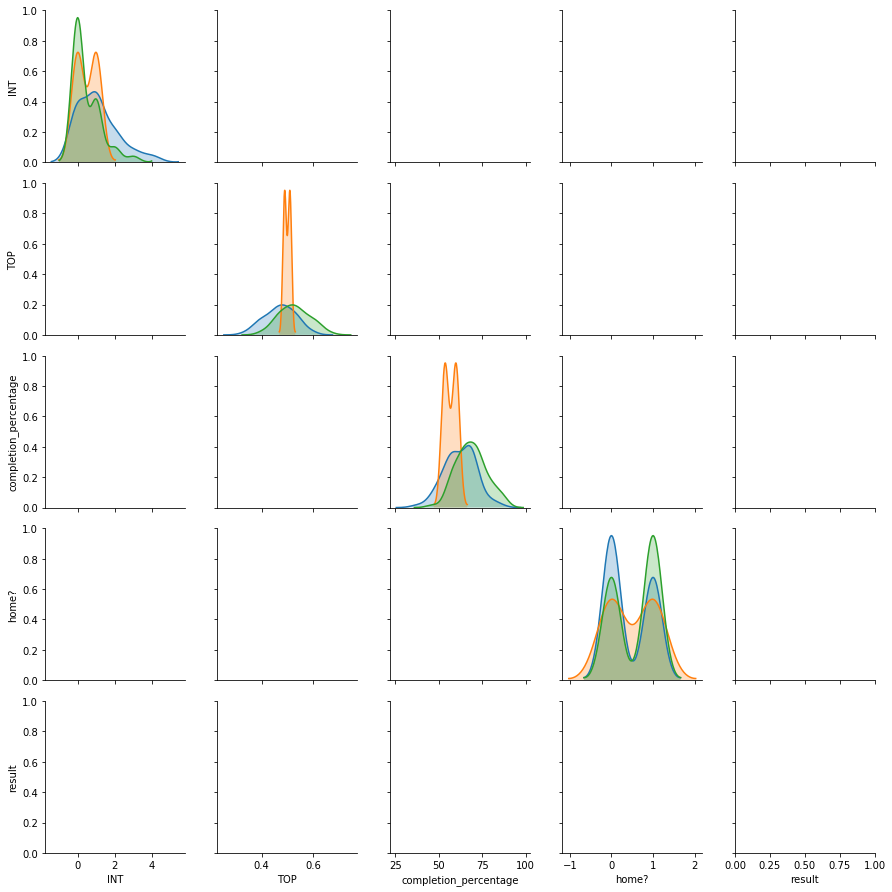

In [398]:
sns.pairplot(eda1_df.iloc[:,[0,1,2,3,13]], hue='result')

In [401]:
eda1_df = eda1_df.rename(columns={'result':'win?'})

In [402]:
eda1_df['win?'] = eda1_df['win?'].replace(to_replace=[-1,1,0], value=[False, True, False])

In [403]:
eda1_df.columns, eda1_df.shape

(Index(['INT', 'TOP', 'completion_percentage', 'home?', 'passing_TD',
        'passing_completions', 'point_differential', 'points', 'rushing_TD',
        'times_sacked', 'turnovers_lost', 'yards_allowed_per_defensive_play',
        'yards_per_play_offense', 'win?'],
       dtype='object'), (156, 14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c276c6450>,
      dtype=object)

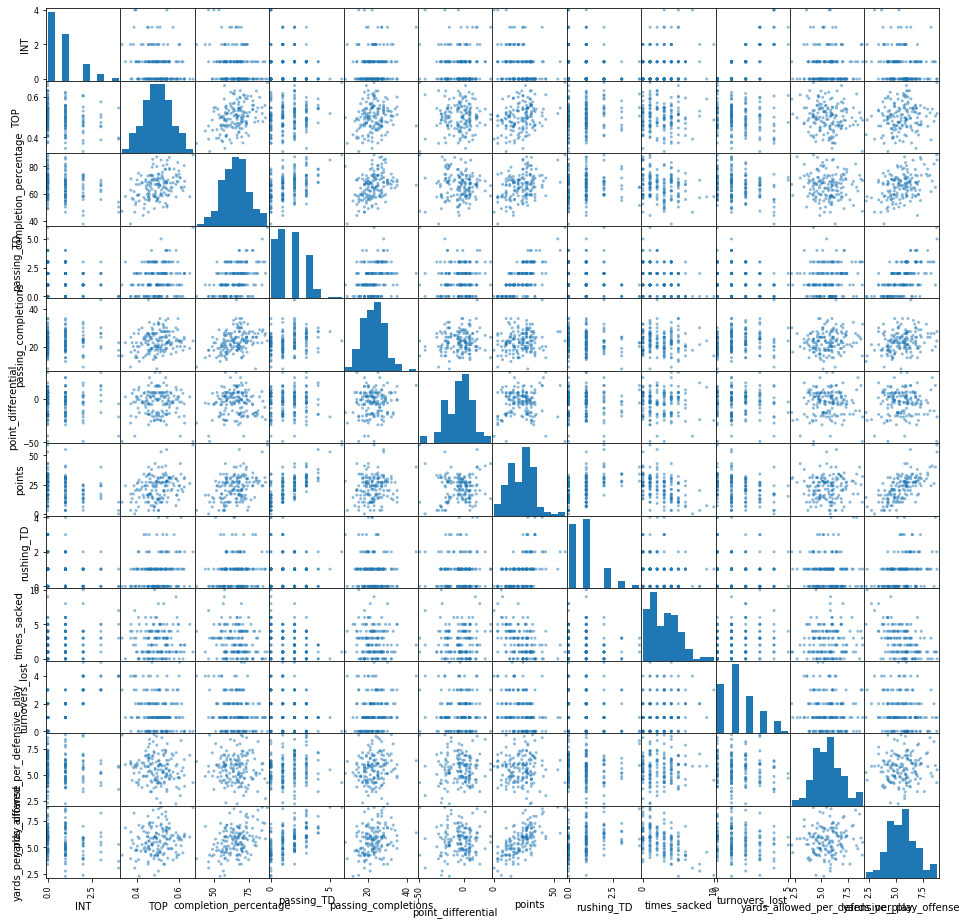

In [417]:
scatter_matrix(eda1_df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12]], figsize=(16,16))

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

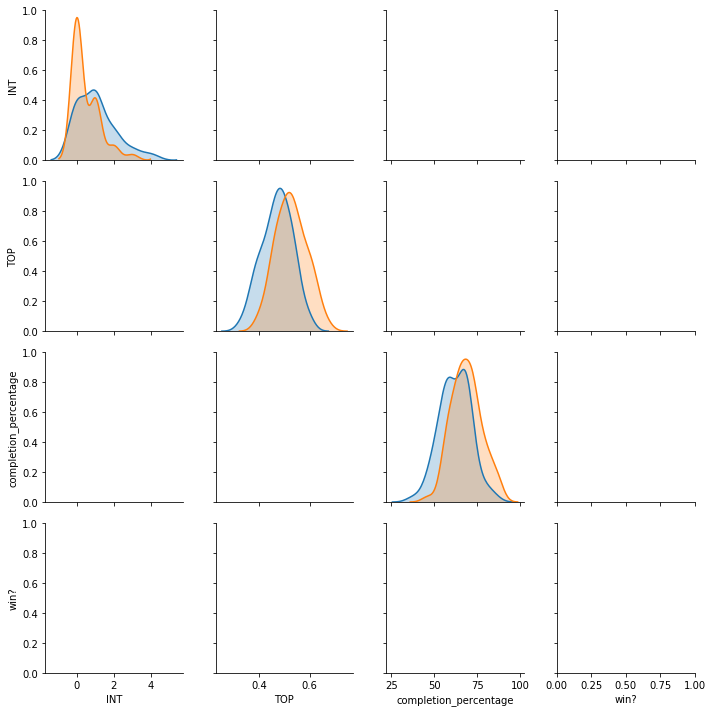

In [407]:
sns.pairplot(eda1_df.iloc[:,[0,1,2,13]], hue='win?')

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

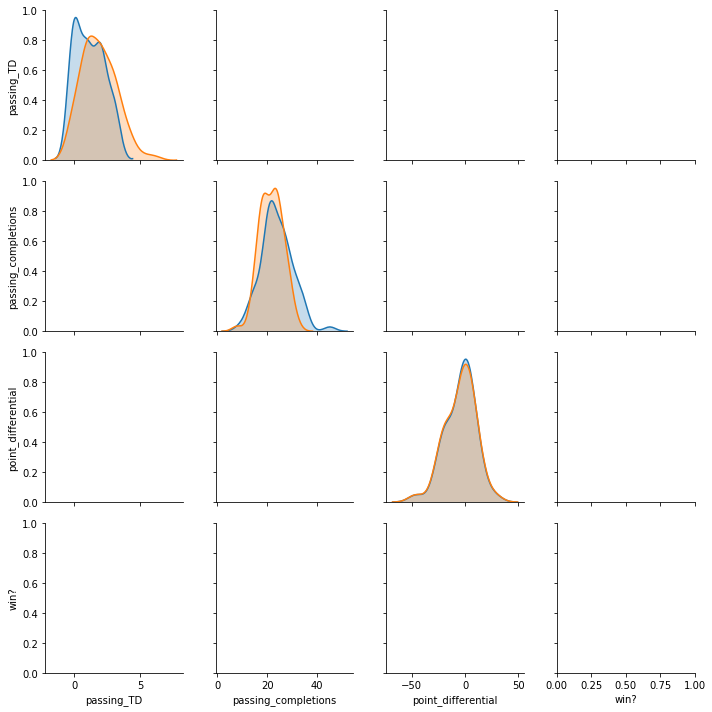

In [408]:
sns.pairplot(eda1_df.iloc[:,[4,5,6,13]], hue='win?')

In [409]:
eda1_df.describe()

,INT,TOP,completion_percentage,passing_TD,passing_completions,point_differential,points,rushing_TD,times_sacked,turnovers_lost,yards_allowed_per_defensive_play,yards_per_play_offense
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.775641,0.500000,65.483974,1.544872,22.782051,-4.576923,22.403846,0.878205,2.538462,1.410256,5.592035,5.592035
std,0.954269,0.065586,9.401074,1.230489,5.577946,14.300480,10.502706,0.925223,2.064710,1.238479,1.305082,1.305084
min,0.000000,0.331389,37.500000,0.000000,8.000000,-49.000000,0.000000,0.000000,0.000000,0.000000,2.234000,2.234000
25%,0.000000,0.456875,58.600000,1.000000,19.000000,-16.000000,14.000000,0.000000,1.000000,0.000000,4.681400,4.681392
50%,1.000000,0.500000,66.450000,1.000000,22.500000,-3.000000,24.000000,1.000000,2.000000,1.000000,5.605850,5.605850
75%,1.000000,0.543125,71.175000,2.000000,26.250000,6.000000,29.250000,1.000000,4.000000,2.000000,6.396325,6.396296
max,4.000000,0.668611,88.500000,6.000000,45.000000,30.000000,59.000000,4.000000,10.000000,5.000000,8.835800,8.835821


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

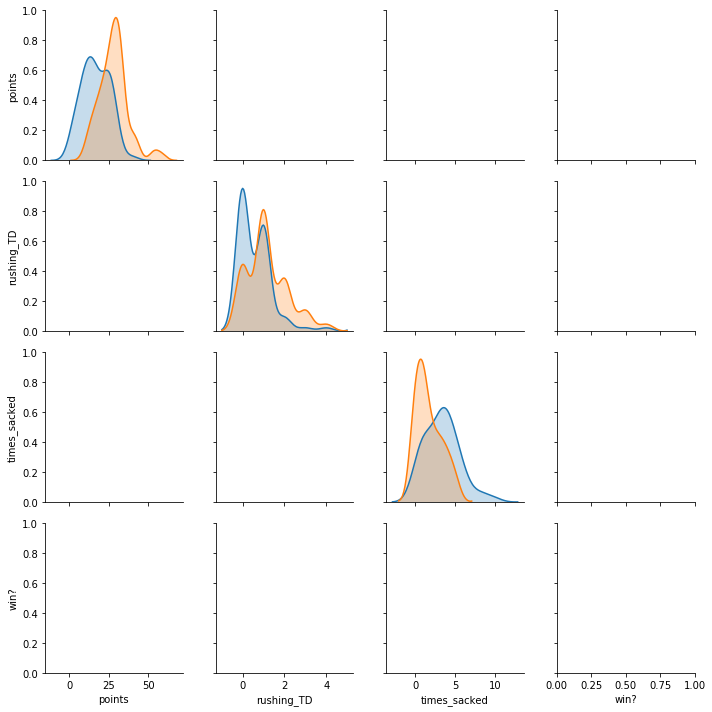

In [410]:
sns.pairplot(eda1_df.iloc[:,[7,8,9,13]], hue='win?')

In [418]:
g_r.columns

Index(['Game_Number', 'INT', 'OT', 'TOP', 'Week', 'combined_points',
       'completion_percentage', 'defensive_plays', 'game_date_time', 'home?',
       'offensive_plays', 'over_under', 'over_under_result', 'pass_attempts',
       'passer_rating', 'passing_TD', 'passing_completions', 'passing_yards',
       'point_differential', 'points', 'result', 'rush_attempts', 'rushing_TD',
       'rushing_yards', 'rushing_yards_per_attempt', 'sack_yards_lost',
       'spread', 'team', 'times_sacked', 'total_yards', 'turnovers_lost',
       'vs_line', 'yards_allowed_per_defensive_play',
       'yards_per_play_offense'],
      dtype='object')

In [419]:
g_r['points_against'] = g_r['combined_points'] - g_r['points']

In [420]:
g_r['point_differential'] = g_r['points'] - g_r['points_against']

In [433]:
w1_5 = g_r[g_r['Week'] <= 5]
w6_7 = g_r[g_r['Week'].between(6,7)]

In [444]:
'''
w1_5 = w1_5.rename(columns={'result':'win?'})
w1_5['win?'] = w1_5['win?'].replace(to_replace=[-1,1,0], value=[False, True, False])
w6_7 = w6_7.rename(columns={'result':'win?'})
w6_7['win?'] = w6_7['win?'].replace(to_replace=[-1,1,0], value=[False, True, False])
'''
len(w6_7['result'])

56

In [434]:
y2_train = w1_5['result'].copy()
X2_train = w1_5[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
             'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()
y2_test = w6_7['result'].copy()
X2_test = w6_7[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
              'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()

In [435]:
rf1 = RandomForestClassifier()
rf1.fit(X2_train, y2_train)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [436]:
rf1.score(X2_test, y2_test)

0.875

In [437]:
y_predict = rf1.predict(X2_test)
confusion_matrix(y2_test, y_predict)

array([[24,  4],
       [ 3, 25]])

In [438]:
print("precision:", precision_score(y2_test, y_predict))
print("recall:", recall_score(y2_test, y_predict))

precision: 0.8620689655172413
recall: 0.8928571428571429


In [439]:
feature_importances = np.argsort(rf1.feature_importances_)
list(X2_train.columns[feature_importances])

['home?',
 'INT',
 'passing_TD',
 'rushing_TD',
 'turnovers_lost',
 'passing_completions',
 'times_sacked',
 'completion_percentage',
 'yards_per_play_offense',
 'yards_allowed_per_defensive_play',
 'TOP']

In [441]:
import matplotlib.pyplot as plt


13. Feature ranking:
1. rushing_TD (0.500121)
2. TOP (0.098784)
3. yards_per_play_offense (0.085892)
4. completion_percentage (0.082169)
5. turnovers_lost (0.049057)
6. passing_completions (0.042445)
7. passing_TD (0.033300)
8. yards_allowed_per_defensive_play (0.028795)
9. times_sacked (0.026792)
10. INT (0.008789)
11. home? (0.000897)


Text(0.5, 1.0, 'Feature Importances')

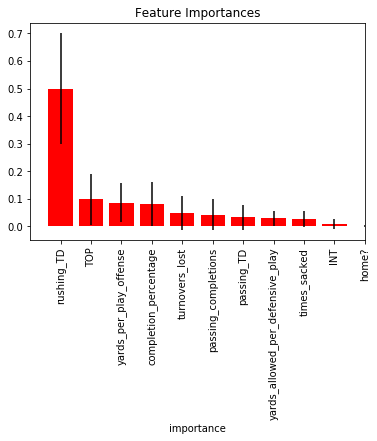

In [443]:
n = 11 # all 11 features

#importances = forest_fit.feature_importances_[:n]
importances = rf.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(X2_train.columns[indices])

# Print the feature ranking
print("\n13. Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()

ax.bar(range(n), importances[indices], yerr=std[indices], color="r", align="center")
ax.set_xticks(range(n))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("importance")
ax.set_title("Feature Importances")

In [445]:
w1_4 = g_r[g_r['Week'] < 5]
w5 = g_r[g_r['Week'] == 5]

In [446]:

y3_train = w1_4['result'].copy()
X3_train = w1_4[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
             'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()
y3_test = w5['result'].copy()
X3_test = w5[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
              'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()

In [460]:
X3_test.iloc[0]

INT                                        0
TOP                                 0.628611
completion_percentage                     69
home?                                   True
passing_TD                                 2
passing_completions                       20
rushing_TD                                 2
times_sacked                               2
turnovers_lost                             0
yards_allowed_per_defensive_play       3.913
yards_per_play_offense               6.28169
Name: 189, dtype: object

In [447]:
rf3 = RandomForestClassifier()
rf3.fit(X3_train, y3_train)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [448]:
rf3.score(X3_test, y3_test)

0.7666666666666667

In [449]:

w6 = g_r[g_r['Week'] == 6]

In [451]:
y4_train = w1_5['result'].copy()
X4_train = w1_5[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
             'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()
y4_test = w6['result'].copy()
X4_test = w6[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
              'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()

In [452]:
rf4 = RandomForestClassifier()
rf4.fit(X4_train, y4_train)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [453]:
rf4.score(X4_test, y4_test)

0.75

In [454]:
w1_6 = g_r[g_r['Week'] < 6]
w7 = g_r[g_r['Week'] == 7]

In [465]:
w1_6.columns, w1_6.shape

(Index(['Game_Number', 'INT', 'OT', 'TOP', 'Week', 'combined_points',
        'completion_percentage', 'defensive_plays', 'game_date_time', 'home?',
        'offensive_plays', 'over_under', 'over_under_result', 'pass_attempts',
        'passer_rating', 'passing_TD', 'passing_completions', 'passing_yards',
        'point_differential', 'points', 'result', 'rush_attempts', 'rushing_TD',
        'rushing_yards', 'rushing_yards_per_attempt', 'sack_yards_lost',
        'spread', 'team', 'times_sacked', 'total_yards', 'turnovers_lost',
        'vs_line', 'yards_allowed_per_defensive_play', 'yards_per_play_offense',
        'points_against'],
       dtype='object'), (156, 35))

In [468]:

w1_6_KAN = g_r[(g_r['team']== 'KAN') & (g_r['Week'] <= 6)].mean()
w1_6_KAN

Game_Number                           3.500000
INT                                   0.166667
OT                                    0.000000
TOP                                   0.444815
Week                                  3.500000
combined_points                      52.666667
completion_percentage                63.750000
defensive_plays                      69.666667
home?                                 1.000000
offensive_plays                      60.333333
over_under                           53.166667
over_under_result                    -0.333333
pass_attempts                        38.500000
passer_rating                       110.716667
passing_TD                            2.333333
passing_completions                  24.500000
passing_yards                       339.333333
point_differential                    4.666667
points                               28.666667
result                                0.333333
rush_attempts                        20.500000
rushing_TD   

In [455]:
y5_train = w1_6['result'].copy()
X5_train = w1_6[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
             'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()
y5_test = w7['result'].copy()
X5_test = w7[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
              'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()


In [456]:
rf5 = RandomForestClassifier()
rf5.fit(X5_train, y5_train)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [457]:
rf5.score(X5_test, y5_test)

0.8571428571428571

In [459]:
## Sklearn confusion matrix has weird syntax:
# array([[TN, FP],
#        [FN, TP]])

confusion_matrix

y3_predict = rf3.predict(X3_test)

y4_predict = rf4.predict(X4_test)

y5_predict = rf5.predict(X4_test)
print("week 5 predictions:", confusion_matrix(y3_test, y3_predict)) 
print("week 6 predictions:", confusion_matrix(y4_test, y4_predict))
print("week 7 predictions:", confusion_matrix(y5_test, y5_predict)) 

week 5 predictions: [[11  4]
 [ 3 12]]
week 6 predictions: [[11  3]
 [ 4 10]]
week 7 predictions: [[7 7]
 [6 8]]


In [461]:
g_r

,Game_Number,INT,OT,TOP,Week,combined_points,completion_percentage,defensive_plays,game_date_time,home?,...,sack_yards_lost,spread,team,times_sacked,total_yards,turnovers_lost,vs_line,yards_allowed_per_defensive_play,yards_per_play_offense,points_against
0,20.0,2.0,0,0.553611,21.0,51.0,61.9,54.0,2020-02-02 06:30:00,True,...,18.0,1.5,KAN,4.0,397.0,2.0,1,6.5000,5.293333,20.0
1,19.0,0.0,0,0.479722,20.0,57.0,75.0,58.0,2020-01-19 03:40:00,True,...,8.0,8.0,SFO,1.0,354.0,0.0,1,6.1724,6.941176,20.0
2,20.0,0.0,0,0.497222,20.0,59.0,65.7,58.0,2020-01-19 02:05:00,True,...,2.0,7.5,KAN,2.0,404.0,0.0,1,5.0862,6.312500,24.0
3,19.0,0.0,0,0.423611,19.0,82.0,65.7,78.0,2020-01-12 02:05:00,True,...,5.0,10.0,KAN,1.0,434.0,1.0,1,5.6667,7.614035,31.0
4,19.0,0.0,0,0.491389,19.0,51.0,59.3,60.0,2020-01-12 05:40:00,True,...,8.0,4.5,GNB,2.0,344.0,0.0,1,6.2500,5.830508,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1.0,0.0,0,0.488333,1.0,56.0,58.3,63.0,2019-09-08 01:00:00,False,...,32.0,5.5,TEN,4.0,339.0,0.0,1,5.4921,6.053600,13.0
263,1.0,1.0,0,0.457500,1.0,36.0,57.4,67.0,2019-09-08 08:20:00,False,...,0.0,5.5,PIT,1.0,308.0,1.0,-1,6.9403,5.049200,33.0
264,1.0,1.0,0,0.501111,1.0,48.0,66.7,65.0,2019-09-08 04:25:00,False,...,8.0,1.0,SFO,1.0,256.0,2.0,1,4.5385,4.266700,17.0
265,1.0,0.0,0,0.425833,1.0,59.0,68.2,71.0,2019-09-08 01:00:00,False,...,10.0,10.5,WAS,1.0,398.0,0.0,1,6.1408,6.862100,32.0


In [462]:
w1_4

,Game_Number,INT,OT,TOP,Week,combined_points,completion_percentage,defensive_plays,game_date_time,home?,...,sack_yards_lost,spread,team,times_sacked,total_yards,turnovers_lost,vs_line,yards_allowed_per_defensive_play,yards_per_play_offense,points_against
204,4.0,0.0,0,0.496111,4.0,30.0,87.1,64.0,2019-09-30 08:15:00,True,...,0.0,3.5,PIT,0.0,326.0,1.0,1,2.7344,5.821429,3.0
205,4.0,1.0,0,0.455556,4.0,26.0,46.2,71.0,2019-09-29 01:00:00,True,...,0.0,7.0,NWE,0.0,224.0,1.0,-1,5.2817,3.612903,10.0
206,4.0,1.0,0,0.489444,4.0,26.0,61.8,65.0,2019-09-29 12:00:00,True,...,32.0,5.5,HOU,6.0,264.0,2.0,-1,4.5692,4.258065,16.0
207,4.0,0.0,0,0.409167,4.0,22.0,75.0,67.0,2019-09-29 03:25:00,True,...,51.0,1.0,MIN,6.0,222.0,2.0,-1,4.0149,3.827586,16.0
208,4.0,2.0,0,0.495278,4.0,65.0,70.6,61.0,2019-09-29 01:00:00,True,...,25.0,7.5,BAL,4.0,395.0,3.0,-1,8.6885,5.895522,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1.0,0.0,0,0.488333,1.0,56.0,58.3,63.0,2019-09-08 01:00:00,False,...,32.0,5.5,TEN,4.0,339.0,0.0,1,5.4921,6.053600,13.0
263,1.0,1.0,0,0.457500,1.0,36.0,57.4,67.0,2019-09-08 08:20:00,False,...,0.0,5.5,PIT,1.0,308.0,1.0,-1,6.9403,5.049200,33.0
264,1.0,1.0,0,0.501111,1.0,48.0,66.7,65.0,2019-09-08 04:25:00,False,...,8.0,1.0,SFO,1.0,256.0,2.0,1,4.5385,4.266700,17.0
265,1.0,0.0,0,0.425833,1.0,59.0,68.2,71.0,2019-09-08 01:00:00,False,...,10.0,10.5,WAS,1.0,398.0,0.0,1,6.1408,6.862100,32.0


In [469]:
from scipy.stats import poisson,skellam

In [472]:
m1 = m[['Away_team', 'Home_team', 'away_points', 'home_points']]

In [475]:
m1.head()

,Away_team,Home_team,away_points,home_points
0,SFO,KAN,20.0,31.0
1,GNB,SFO,20.0,37.0
2,TEN,KAN,24.0,35.0
3,HOU,KAN,31.0,51.0
4,SEA,GNB,23.0,28.0


In [477]:
# every game first 5 weeks of the season
y = w1_5['result'].copy() # this is the target, win is 1 loss is -1 
# these are the statistics from each game I'm guessing are important at 
# determining the result
X = w1_5[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
             'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()

In [496]:
home.columns = ['team', 'Week', 'Game_Number', 'result', 'OT', 'points',
        'point_differential', 'combined_points', 'spread', 'vs_line',
        'over_under', 'over_under_result', 'total_yards', 'offensive_plays',
        'yards_per_play_offense', 'defensive_plays',
        'yards_allowed_per_defensive_play', 'turnovers_lost', 'TOP',
        'game_date_time', 'passing_completions', 'pass_attempts',
        'completion_percentage', 'passing_yards', 'passing_TD', 'INT',
        'times_sacked', 'sack_yards_lost', 'passer_rating', 'rush_attempts',
        'rushing_yards', 'rushing_yards_per_attempt', 'rushing_TD', 'home?']

In [498]:
home.iloc[0]

team                                                KAN
Week                                                 21
Game_Number                                          20
result                                                0
OT                                                   31
points                                              -11
point_differential                                   51
combined_points                                     1.5
spread                                             52.5
vs_line                                              26
over_under                                           42
over_under_result                                  61.9
total_yards                                         268
offensive_plays                                       2
yards_per_play_offense                                2
defensive_plays                                       4
yards_allowed_per_defensive_play                     18
turnovers_lost                                  

In [494]:
away.columns, away.shape

(Index(['team', 'Week', 'Game_Number', 'result', 'OT', 'points',
        'point_differential', 'combined_points', 'spread', 'vs_line',
        'over_under', 'over_under_result', 'total_yards', 'offensive_plays',
        'yards_per_play_offense', 'defensive_plays',
        'yards_allowed_per_defensive_play', 'turnovers_lost', 'TOP',
        'game_date_time', 'passing_completions', 'pass_attempts',
        'completion_percentage', 'passing_yards', 'passing_TD', 'INT',
        'times_sacked', 'sack_yards_lost', 'passer_rating', 'rush_attempts',
        'rushing_yards', 'rushing_yards_per_attempt', 'rushing_TD', 'home?'],
       dtype='object'), (267, 34))

In [488]:


X = some dataframe
y = target from that dataframe

model = some machine learning model class ()

model.fit(X,y)

model.score(X_test_6_weeks, y_test)



model.predict()


team                                                SFO
Week                                                 21
Game_Number                                          20
result                                               -1
OT                                                    0
points                                               20
point_differential                                  -11
combined_points                                      51
spread                                              1.5
vs_line                                              -1
over_under                                         52.5
over_under_result                                    -1
total_yards                                         351
offensive_plays                                      54
yards_per_play_offense                              6.5
defensive_plays                                      75
yards_allowed_per_defensive_play                 5.2933
turnovers_lost                                  

In [478]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)



In [479]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [480]:
model.score(X_test, y_test)

0.8205128205128205

In [481]:
y_predict = model.predict(X_test)

print('precision score:',precision_score(y_test, y_predict))
print('recall score:',recall_score(y_test, y_predict))

precision score: 0.9230769230769231
recall score: 0.6666666666666666


In [482]:
# array([[TN, FP],
#        [FN, TP]])
confusion_matrix(y_test, y_predict)

array([[20,  1],
       [ 6, 12]])

In [535]:
g_r.columns

Index(['team', 'Week', 'Game_Number', 'result', 'OT', 'points',
       'point_differential', 'combined_points', 'spread', 'vs_line',
       'over_under', 'over_under_result', 'total_yards', 'offensive_plays',
       'yards_per_play_offense', 'defensive_plays',
       'yards_allowed_per_defensive_play', 'turnovers_lost', 'TOP',
       'game_date_time', 'passing_completions', 'pass_attempts',
       'completion_percentage', 'passing_yards', 'passing_TD', 'INT',
       'times_sacked', 'sack_yards_lost', 'passer_rating', 'rush_attempts',
       'rushing_yards', 'rushing_yards_per_attempt', 'rushing_TD', 'home?'],
      dtype='object')

In [533]:
g_r = game_results.copy()

In [534]:
g_r['team'].unique()

array(['KAN', 'SFO', 'GNB', 'BAL', 'NOR', 'PHI', 'HOU', 'NWE', 'TAM',
       'NYJ', 'CLE', 'LAR', 'TEN', 'IND', 'CHI', 'DEN', 'PIT', 'DAL',
       'MIN', 'SEA', 'ATL', 'CIN', 'LAC', 'NYG', 'OAK', 'CAR', 'BUF',
       'DET', 'WAS', 'JAX', 'ARI', 'MIA'], dtype=object)

In [537]:
teams = g_r['team'].unique()

for team in teams:
    w1_4_avg = g_r[(g_r['team']== '{team}') & (g_r['Week'] <= 4)].mean()
    

In [538]:
w1_4_avg

team                               NaN
Week                               NaN
Game_Number                        NaN
result                             NaN
OT                                 NaN
points                             NaN
point_differential                 NaN
combined_points                    NaN
spread                             NaN
vs_line                            NaN
over_under                         NaN
over_under_result                  NaN
total_yards                        NaN
offensive_plays                    NaN
yards_per_play_offense             NaN
defensive_plays                    NaN
yards_allowed_per_defensive_play   NaN
turnovers_lost                     NaN
TOP                                NaN
game_date_time                     NaN
passing_completions                NaN
pass_attempts                      NaN
completion_percentage              NaN
passing_yards                      NaN
passing_TD                         NaN
INT                      

In [540]:
g_r.head()

,team,Week,Game_Number,result,OT,points,point_differential,combined_points,spread,vs_line,...,passing_TD,INT,times_sacked,sack_yards_lost,passer_rating,rush_attempts,rushing_yards,rushing_yards_per_attempt,rushing_TD,home?
0,KAN,21.0,20.0,1,0,31.0,-11.0,51.0,1.5,1,...,2.0,2.0,4.0,18.0,76.3,29.0,129.0,4.45,2.0,True
1,SFO,20.0,19.0,1,0,37.0,-17.0,57.0,8.0,1,...,0.0,0.0,1.0,8.0,100.5,42.0,285.0,6.79,4.0,True
2,KAN,20.0,20.0,1,0,35.0,-11.0,59.0,7.5,1,...,3.0,0.0,2.0,2.0,120.2,27.0,112.0,4.15,2.0,True
3,KAN,19.0,19.0,1,0,51.0,-20.0,82.0,10.0,1,...,5.0,0.0,1.0,5.0,134.0,21.0,118.0,5.62,2.0,True
4,GNB,19.0,19.0,1,0,28.0,-5.0,51.0,4.5,1,...,2.0,0.0,2.0,8.0,112.4,30.0,109.0,3.63,2.0,True


In [544]:
g_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 266
Data columns (total 34 columns):
team                                534 non-null object
Week                                534 non-null float64
Game_Number                         534 non-null float64
result                              534 non-null int64
OT                                  534 non-null int64
points                              534 non-null float64
point_differential                  534 non-null float64
combined_points                     534 non-null float64
spread                              534 non-null float64
vs_line                             534 non-null int64
over_under                          534 non-null float64
over_under_result                   534 non-null int64
total_yards                         534 non-null float64
offensive_plays                     534 non-null float64
yards_per_play_offense              534 non-null float64
defensive_plays                     534 non-null 

In [563]:
kc_avg = g_r[(g_r['team']== 'KAN') & (g_r['Week'] <= 4)].mean()

TypeError: 'tuple' object is not callable

In [561]:
kc_avg.shape

(32,)

In [598]:
team_avg = []
teams = list(g_r['team'].unique())
for i in teams:
    avg = g_r[(g_r['team']== i) & (g_r['Week'] <= 4)].mean()
    team_avg.append(avg)
team_avg
w1_4_avg = pd.concat(team_avg, keys=g_r['team'].unique())
w1_4_avg

KAN  Week                          2.5000
     Game_Number                   2.5000
     result                        1.0000
     OT                            0.0000
     points                       33.7500
                                   ...   
MIA  rush_attempts                17.2500
     rushing_yards                51.7500
     rushing_yards_per_attempt     2.8875
     rushing_TD                    0.0000
     home?                         0.0000
Length: 1024, dtype: float64

In [567]:
w1_4_avg.index

MultiIndex([('KAN',                      'Week'),
            ('KAN',               'Game_Number'),
            ('KAN',                    'result'),
            ('KAN',                        'OT'),
            ('KAN',                    'points'),
            ('KAN',        'point_differential'),
            ('KAN',           'combined_points'),
            ('KAN',                    'spread'),
            ('KAN',                   'vs_line'),
            ('KAN',                'over_under'),
            ...
            ('MIA',                'passing_TD'),
            ('MIA',                       'INT'),
            ('MIA',              'times_sacked'),
            ('MIA',           'sack_yards_lost'),
            ('MIA',             'passer_rating'),
            ('MIA',             'rush_attempts'),
            ('MIA',             'rushing_yards'),
            ('MIA', 'rushing_yards_per_attempt'),
            ('MIA',                'rushing_TD'),
            ('MIA',               

In [599]:
w1_4_avg = w1_4_avg.unstack(level=-1)
w1_4_avg

,Week,Game_Number,result,OT,points,point_differential,combined_points,spread,vs_line,over_under,...,passing_TD,INT,times_sacked,sack_yards_lost,passer_rating,rush_attempts,rushing_yards,rushing_yards_per_attempt,rushing_TD,home?
KAN,2.5,2.5,1.00,0.00,33.75,-10.250000,57.250000,5.625000,0.500000,52.250000,...,2.500000,0.000000,0.750000,4.500000,120.350000,24.500000,101.750000,4.070000,1.250000,1.000000
SFO,2.0,2.0,1.00,0.00,32.00,11.333333,50.000000,2.666667,0.333333,47.166667,...,1.666667,1.333333,0.666667,5.666667,97.433333,38.000000,175.000000,4.476667,1.333333,0.333333
GNB,2.5,2.5,0.50,0.00,21.25,-0.500000,38.500000,4.250000,0.500000,44.500000,...,1.500000,0.250000,2.000000,15.750000,93.550000,24.500000,86.250000,3.425000,1.000000,0.750000
BAL,2.5,2.5,0.00,0.00,33.75,-11.250000,58.750000,8.000000,-0.500000,46.500000,...,2.750000,0.500000,2.500000,14.500000,105.825000,35.000000,205.750000,5.897500,1.500000,0.750000
NOR,2.5,2.5,0.50,0.00,21.00,-3.000000,44.000000,4.000000,0.000000,48.875000,...,1.000000,0.750000,2.000000,17.000000,87.650000,22.750000,102.500000,4.515000,0.500000,0.250000
PHI,2.5,2.5,0.00,0.00,27.50,2.250000,53.750000,4.750000,-0.500000,47.000000,...,2.250000,0.500000,1.750000,7.750000,97.050000,28.750000,118.750000,3.965000,1.250000,0.750000
HOU,2.5,2.5,0.00,0.00,19.50,2.500000,39.000000,5.625000,0.000000,47.875000,...,1.500000,0.500000,4.500000,25.500000,92.100000,23.500000,120.250000,5.065000,1.000000,0.500000
NWE,2.5,2.5,1.00,0.00,30.50,-23.750000,37.250000,12.750000,0.000000,45.500000,...,1.750000,0.500000,1.000000,5.750000,97.025000,28.500000,91.250000,3.172500,1.250000,1.000000
TAM,2.5,2.5,0.00,0.00,30.75,9.000000,60.000000,5.375000,0.000000,48.875000,...,2.250000,1.250000,3.000000,18.250000,93.125000,29.750000,113.250000,3.827500,0.750000,0.500000
NYJ,2.0,2.0,-1.00,0.00,11.00,-11.666667,34.333333,9.833333,-0.333333,43.166667,...,0.333333,0.333333,4.333333,27.000000,70.400000,21.666667,65.666667,2.973333,0.000000,0.333333


In [600]:
w1_4_avg = w1_4_avg.drop(labels=['DET', 'MIA'])

In [601]:
w1_4_avg

,Week,Game_Number,result,OT,points,point_differential,combined_points,spread,vs_line,over_under,...,passing_TD,INT,times_sacked,sack_yards_lost,passer_rating,rush_attempts,rushing_yards,rushing_yards_per_attempt,rushing_TD,home?
KAN,2.5,2.5,1.00,0.00,33.75,-10.250000,57.250000,5.625000,0.500000,52.250000,...,2.500000,0.000000,0.750000,4.500000,120.350000,24.500000,101.750000,4.070000,1.250000,1.000000
SFO,2.0,2.0,1.00,0.00,32.00,11.333333,50.000000,2.666667,0.333333,47.166667,...,1.666667,1.333333,0.666667,5.666667,97.433333,38.000000,175.000000,4.476667,1.333333,0.333333
GNB,2.5,2.5,0.50,0.00,21.25,-0.500000,38.500000,4.250000,0.500000,44.500000,...,1.500000,0.250000,2.000000,15.750000,93.550000,24.500000,86.250000,3.425000,1.000000,0.750000
BAL,2.5,2.5,0.00,0.00,33.75,-11.250000,58.750000,8.000000,-0.500000,46.500000,...,2.750000,0.500000,2.500000,14.500000,105.825000,35.000000,205.750000,5.897500,1.500000,0.750000
NOR,2.5,2.5,0.50,0.00,21.00,-3.000000,44.000000,4.000000,0.000000,48.875000,...,1.000000,0.750000,2.000000,17.000000,87.650000,22.750000,102.500000,4.515000,0.500000,0.250000
PHI,2.5,2.5,0.00,0.00,27.50,2.250000,53.750000,4.750000,-0.500000,47.000000,...,2.250000,0.500000,1.750000,7.750000,97.050000,28.750000,118.750000,3.965000,1.250000,0.750000
HOU,2.5,2.5,0.00,0.00,19.50,2.500000,39.000000,5.625000,0.000000,47.875000,...,1.500000,0.500000,4.500000,25.500000,92.100000,23.500000,120.250000,5.065000,1.000000,0.500000
NWE,2.5,2.5,1.00,0.00,30.50,-23.750000,37.250000,12.750000,0.000000,45.500000,...,1.750000,0.500000,1.000000,5.750000,97.025000,28.500000,91.250000,3.172500,1.250000,1.000000
TAM,2.5,2.5,0.00,0.00,30.75,9.000000,60.000000,5.375000,0.000000,48.875000,...,2.250000,1.250000,3.000000,18.250000,93.125000,29.750000,113.250000,3.827500,0.750000,0.500000
NYJ,2.0,2.0,-1.00,0.00,11.00,-11.666667,34.333333,9.833333,-0.333333,43.166667,...,0.333333,0.333333,4.333333,27.000000,70.400000,21.666667,65.666667,2.973333,0.000000,0.333333


In [596]:
w1_4 = g_r[g_r['Week'] <= 4]
w5 = g_r[g_r['Week'] == 5]

In [591]:
w1_4_avg.index

Index(['KAN', 'SFO', 'GNB', 'BAL', 'NOR', 'PHI', 'HOU', 'NWE', 'TAM', 'NYJ',
       'CLE', 'LAR', 'TEN', 'IND', 'CHI', 'DEN', 'PIT', 'DAL', 'MIN', 'SEA',
       'ATL', 'CIN', 'LAC', 'NYG', 'OAK', 'CAR', 'BUF', 'DET', 'WAS', 'JAX',
       'ARI', 'MIA'],
      dtype='object')

In [594]:
w5['team'].unique()

array(['SFO', 'HOU', 'TEN', 'KAN', 'CIN', 'LAC', 'DAL', 'CAR', 'MIN',
       'PHI', 'BAL', 'CHI', 'NOR', 'NWE', 'SEA', 'CLE', 'ATL', 'BUF',
       'IND', 'ARI', 'DEN', 'GNB', 'JAX', 'NYG', 'NYJ', 'PIT', 'OAK',
       'TAM', 'WAS', 'LAR'], dtype=object)

In [592]:
a = w5['team'].unique()

w1_4_avg2 = w1_4_avg[w1_4_avg]

In [593]:
w1_4_avg.shape

(32,)

In [602]:

y_train = w1_4['result'].copy() 
X_train = w1_4[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
             'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()

y_test = w5['result'].copy()
X_test = w1_4_avg[['INT', 'TOP', 'completion_percentage', 'home?', 
              'passing_TD', 'passing_completions', 
             'rushing_TD', 'times_sacked', 'turnovers_lost', 
              'yards_allowed_per_defensive_play', 'yards_per_play_offense']].copy()

In [603]:
y_test.shape, y_train.shape, X_train.shape, X_test.shape

((30,), (126,), (126, 11), (30, 11))

In [604]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [605]:
model.score(X_test, y_test)

0.6666666666666666

In [606]:
y_predict = model.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[ 8,  7],
       [ 3, 12]])